# Import python packages

In [203]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn
from sklearn import linear_model
from scipy.optimize import curve_fit
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, f1_score, confusion_matrix
from scipy import stats
import warnings
from sklearn.metrics import ConfusionMatrixDisplay
warnings.filterwarnings('ignore')
import matplotlib.colors as mcolors
from scipy.stats import lognorm
from utils import * 
import matplotlib.transforms as mtransforms

mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.weight'] = 'normal'
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['font.size'] = 14

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read data

In [204]:
# load data
data = pd.read_csv('aEQgate_geometries.csv')
feature = data["Feature"].unique()
grouped = data.groupby(data.Feature)

In [205]:
data.head()

FDHI ID   Earthquake          Date  Magnitude        Style  Hypocenter lat  \
0        4  Balochistan  '2013-09-24'        7.7  Strike-Slip          26.951   
1        4  Balochistan  '2013-09-24'        7.7  Strike-Slip          26.951   
2        4  Balochistan  '2013-09-24'        7.7  Strike-Slip          26.951   
3        4  Balochistan  '2013-09-24'        7.7  Strike-Slip          26.951   
4        4  Balochistan  '2013-09-24'        7.7  Strike-Slip          26.951   

   Hypocenter lon Feature Breached or unbreached  \
0          65.501    bend               breached   
1          65.501    bend               breached   
2          65.501    bend               breached   
3          65.501    bend               breached   
4          65.501    bend               breached   

  Type (releasing or restraining)  ... Spacing double bend (m)  \
0                             NaN  ...                     0.0   
1                             NaN  ...                     0.0   
2                             NaN  ...                     0.0   
3                             NaN  ...                     0.0   
4                             NaN  ...                     0.0   

   Type (length or angle)  Location along rupture  Total rupture length  \
0                   angle              919.999997         199115.277475   
1                   angle             3529.999990         199115.277475   
2                   angle             7669.999970         199115.277475   
3                   angle            12099.999941         199115.277475   
4                   angle            15129.999919         199115.277475   

  Normalized location  Distance to epicenter  Slip at gate (m)  \
0            0.004620          159516.764576          3.073435   
1            0.017728          156972.220664          4.169092   
2            0.038520          153077.215326          4.470297   
3            0.060769          148934.593509          7.988020   
4            0.075986          146027.408927          6.627956   

   Normalized slip at gate  UTM zone  Cumulative displacement  
0                 0.192090       41N                    450.0  
1                 0.260568       41N                    450.0  
2                 0.279394       41N                    450.0  
3                 0.499251       41N                    450.0  
4                 0.414247       41N                    450.0  

[5 rows x 23 columns]

# Quickly play around with data
e.g. find largest restraining step-over

In [206]:
# data = pd.read_csv('aEQgate_geometries.csv')
# feature = data["Feature"].unique()
# grouped = data.groupby(data.Feature)
# grouped = grouped.get_group('bend')
# #restraining_rows = grouped[grouped["Type (releasing or restraining)"] == 'releasing']
# #print(len(restraining_rows))
# # # # # locations = grouped[grouped['Earthquake'] == 'Zirkuh'].index
# # # # # print(grouped.loc[locations, 'Length (m) or angle (deg)'])

# # # # # # Filter rows where "Type (releasing or restraining)" is the type of interest
# restraining_rows = grouped[grouped["Type (single or double)"] == 'single']

# # # # # # # Filter rows where "Breached or unbreached" is the type of interest
# breached_rows = restraining_rows[restraining_rows["Breached or unbreached"] == 'breached']
# #max_length_or_angle = breached_rows["Distance splay or double bend (m)"].max()
# # # # # # # # # Find location and value of the largest entry in "Length (m) or angle (deg)"
# # #max_length_or_angle = restraining_rows["Length (m) or angle (deg)"].max()
# largest_entry = breached_rows.loc[breached_rows["Length (m) or angle (deg)"].idxmax()]

# print(largest_entry)
# # # Find locations where the distance exceeds 2000


# plot and analyze data

### Earthquake gate distributions

CDFs

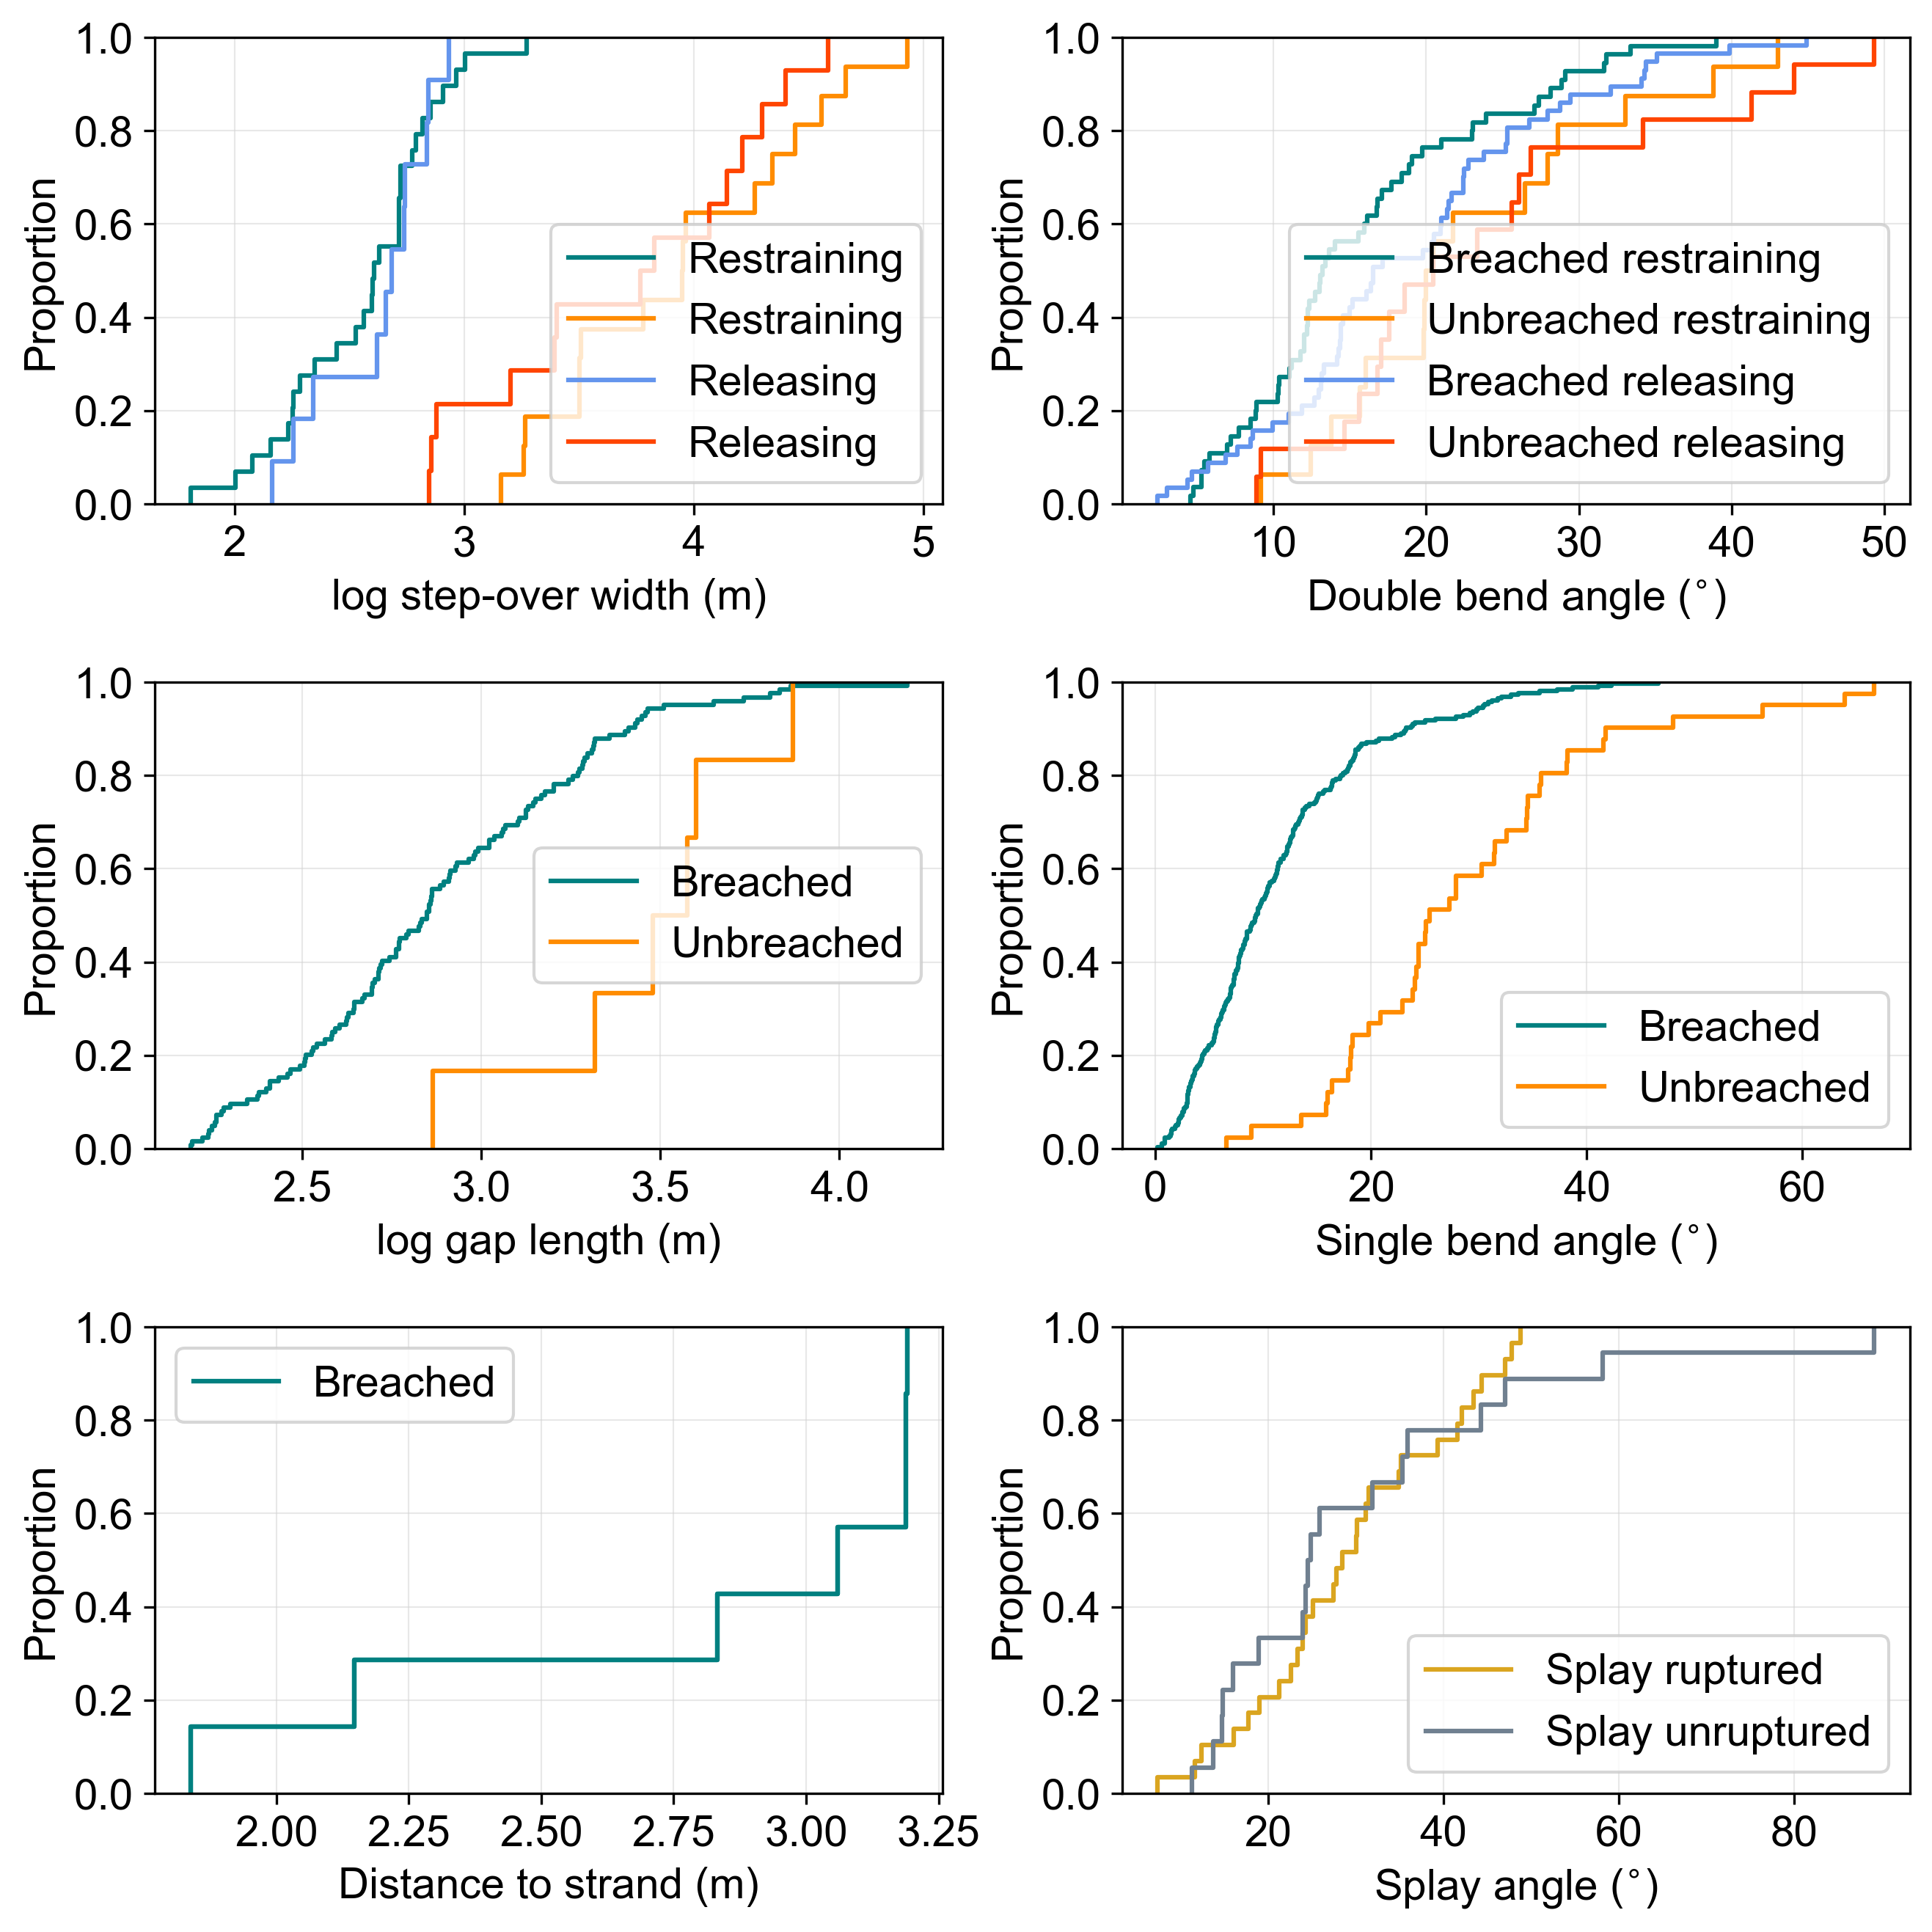

In [207]:
fig, axes = plt.subplots(3,2,figsize=(9,9),dpi=300)
build_cdf(grouped,'stepover', 'restraining', 'length', 'teal','darkorange',axes[0,0] ,'log step-over width (m)','Restraining', 'Restraining')
build_cdf(grouped,'stepover', 'releasing', 'length', 'cornflowerblue','orangered',axes[0,0] , 'log step-over width (m)','Releasing', 'Releasing')
build_cdf(grouped,'bend', 'restraining', 'angle','teal','darkorange',axes[0,1] ,'Double bend angle ($^{\circ}$)','Breached restraining', 'Unbreached restraining')
build_cdf(grouped,'bend', 'releasing', 'angle', 'cornflowerblue','orangered',axes[0,1] ,'Double bend angle ($^{\circ}$)','Breached releasing', 'Unbreached releasing')
build_cdf(grouped,'gap', 'none', 'length', 'teal','darkorange',axes[1,0] , 'log gap length (m)','Breached', 'Unbreached')
build_cdf(grouped,'bend', 'single', 'angle', 'teal','darkorange',axes[1,1] ,'Single bend angle ($^{\circ}$)','Breached', 'Unbreached')
build_cdf(grouped,'splay', 'none', 'angle', 'goldenrod','slategrey',axes[2,1] ,'Splay angle ($^{\circ}$)','Splay ruptured', 'Splay unruptured')
build_cdf(grouped,'strand', 'none', 'length', 'teal','teal',axes[2,0] ,'Distance to strand (m)','Breached', '')
plt.tight_layout()
plt.savefig('GRL/CDFs.pdf')
plt.show()



log-normal distribution fitting

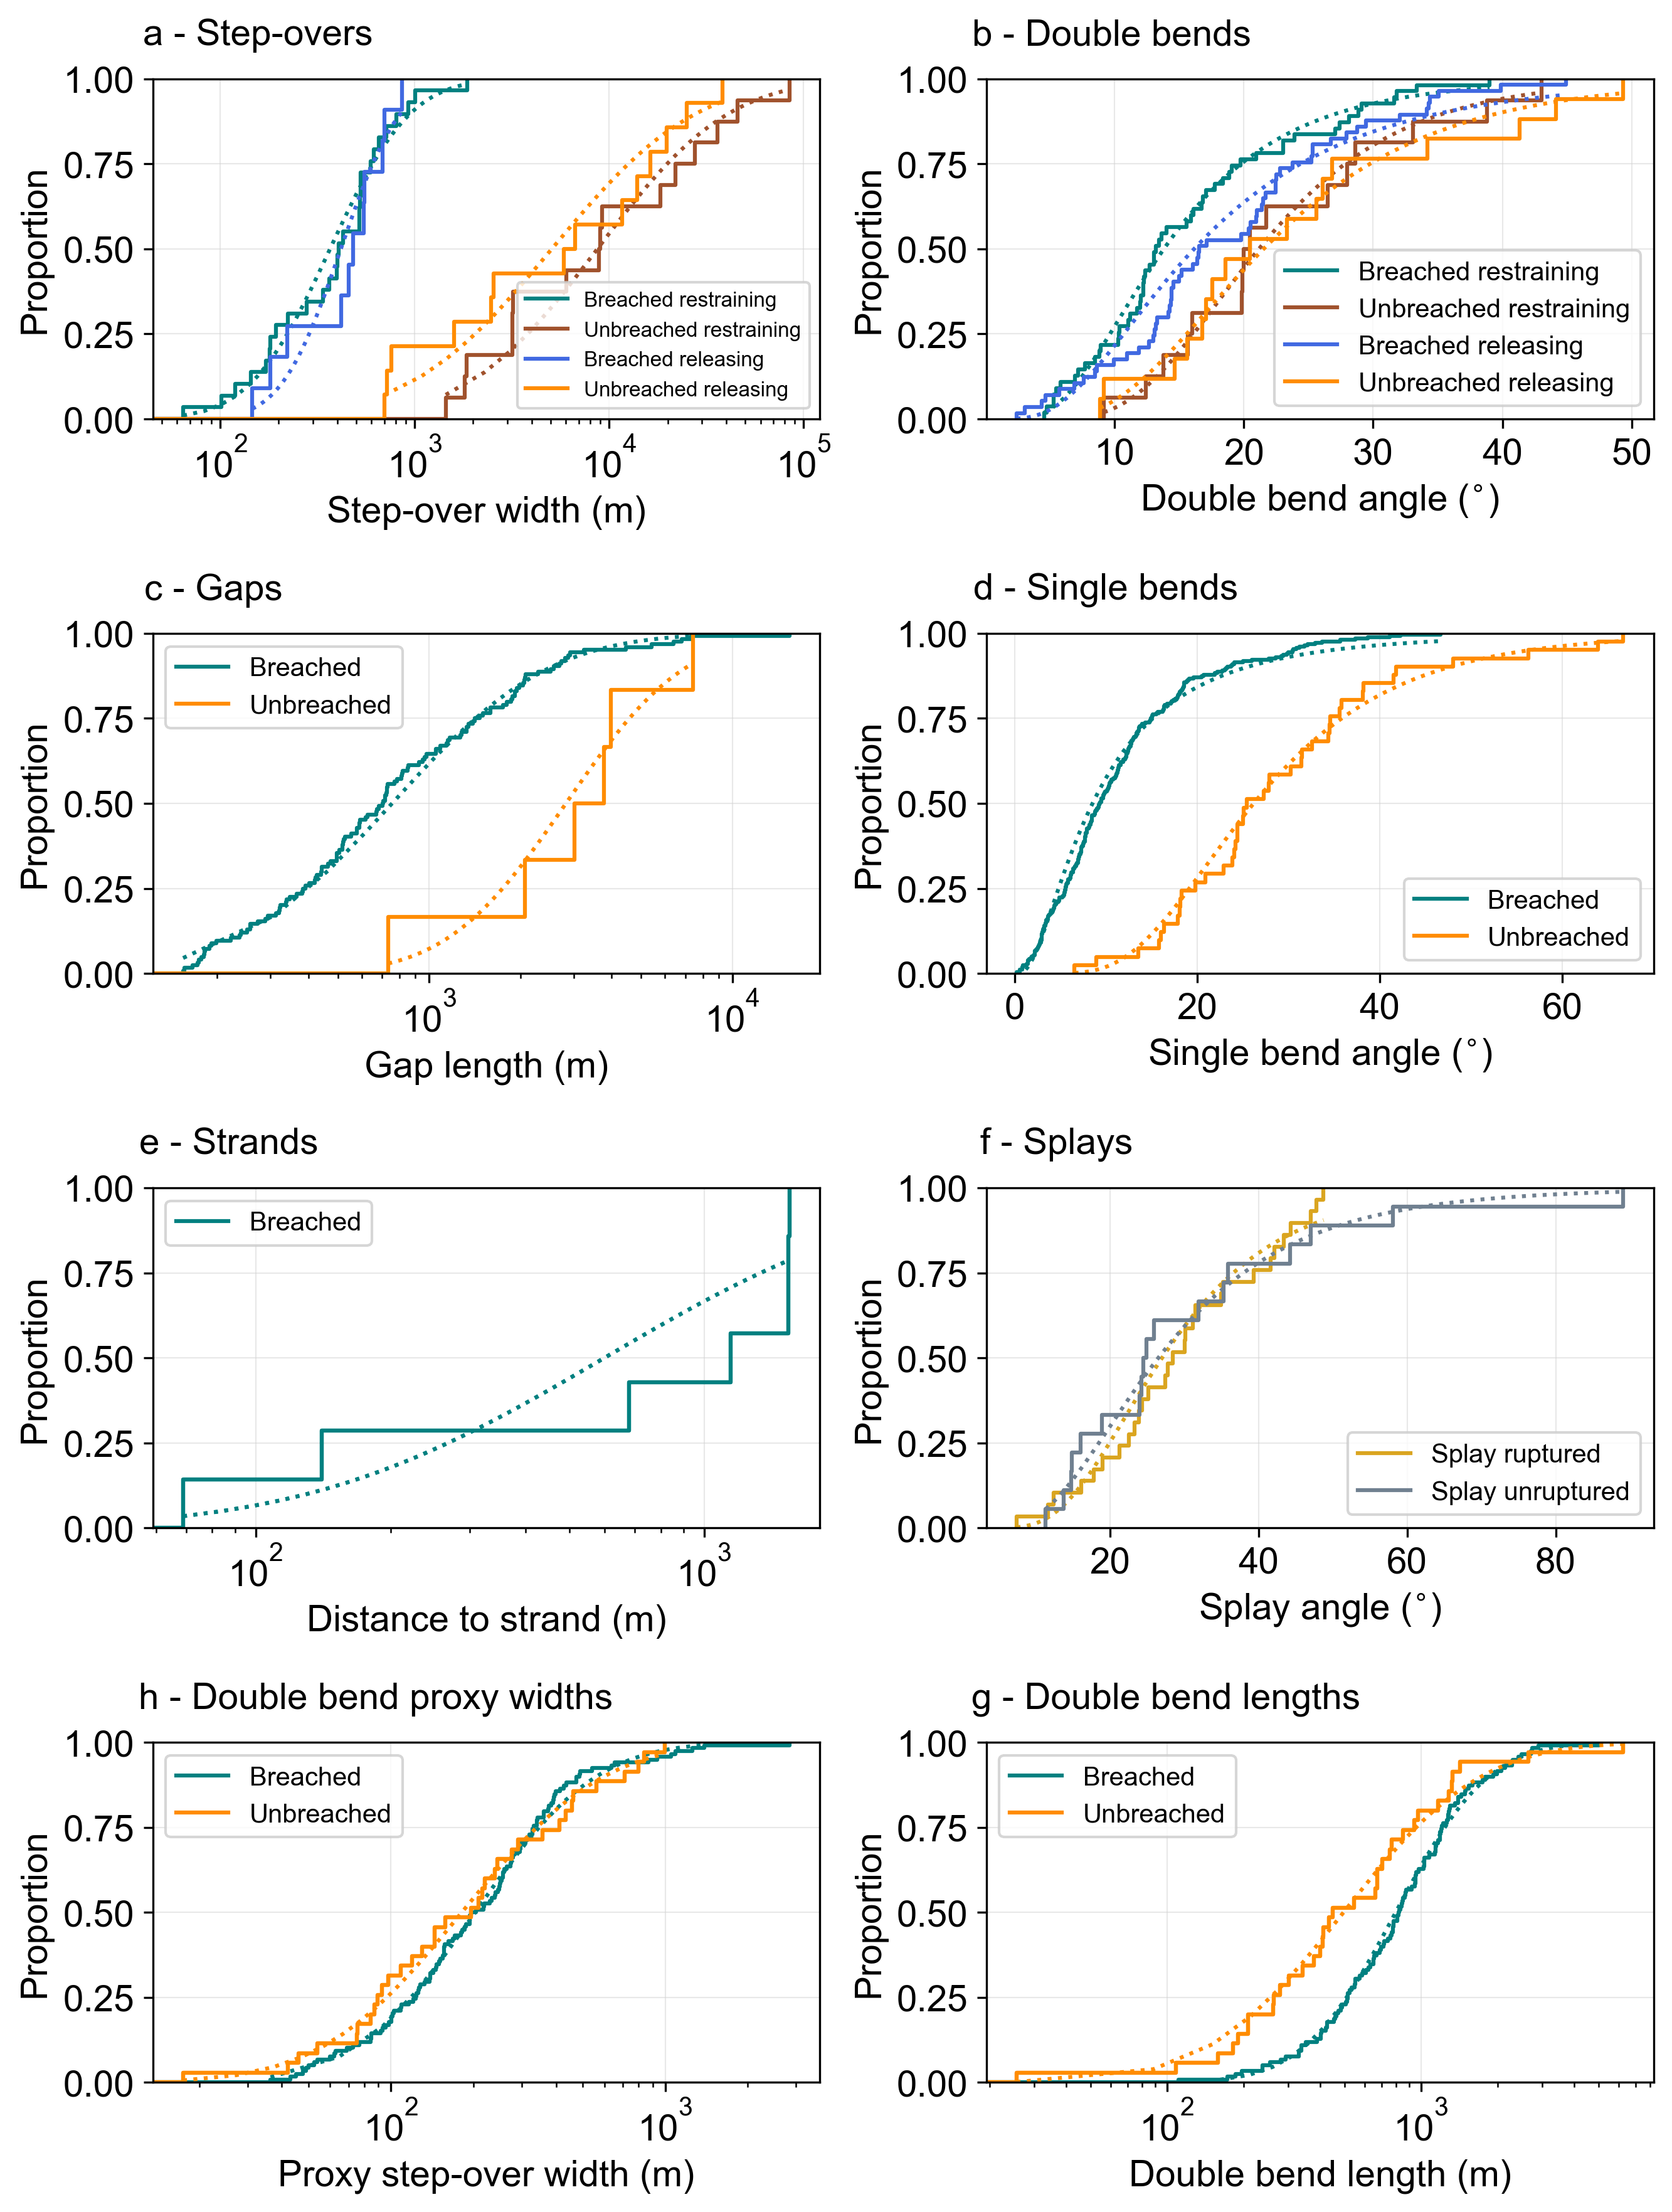

In [208]:
fig, axes = plt.subplots(4,2,figsize=(9,12),dpi=300)

build_cdf_lognorm(grouped,'stepover', 'restraining', 'length', 'teal','sienna',axes[0,0] ,'Step-over width (m)','Breached restraining', 'Unbreached restraining')
build_cdf_lognorm(grouped,'stepover', 'releasing', 'length', 'royalblue','darkorange',axes[0,0] , 'Step-over width (m)','Breached releasing', 'Unbreached releasing')
build_cdf_lognorm(grouped,'bend', 'restraining', 'angle','teal','sienna',axes[0,1] ,'Double bend angle ($^{\circ}$)','Breached restraining', 'Unbreached restraining')
build_cdf_lognorm(grouped,'bend', 'releasing', 'angle', 'royalblue','darkorange',axes[0,1] ,'Double bend angle ($^{\circ}$)','Breached releasing', 'Unbreached releasing')
build_cdf_lognorm(grouped,'gap', 'none', 'length', 'teal','darkorange',axes[1,0] , 'Gap length (m)','Breached', 'Unbreached')
build_cdf_lognorm(grouped,'bend', 'single', 'angle', 'teal','darkorange',axes[1,1] ,'Single bend angle ($^{\circ}$)','Breached', 'Unbreached')
build_cdf_lognorm(grouped,'splay', 'none', 'angle', 'goldenrod','slategrey',axes[2,1] ,'Splay angle ($^{\circ}$)','Splay ruptured', 'Splay unruptured')
build_cdf_lognorm(grouped,'strand', 'none', 'length', 'teal','teal',axes[2,0] ,'Distance to strand (m)','Breached', '')
build_cdf_bend_lengths(grouped,'bend', 'double', 'Distance splay or double bend (m)', 'teal','darkorange',axes[3,1],'Double bend length (m)','Breached', 'Unbreached')
build_cdf_bend_lengths(grouped,'bend', 'double', 'Spacing double bend (m)', 'teal','darkorange',axes[3,0],'Proxy step-over width (m)','Breached', 'Unbreached')

# add labels
axes[0,0].text(40,1.1,'a - Step-overs',fontsize=14)
axes[0,1].text(-1,1.1,'b - Double bends',fontsize=14)
axes[1,0].text(115,1.1,'c - Gaps',fontsize=14)
axes[1,1].text(-4.5,1.1,'d - Single bends',fontsize=14)
axes[2,0].text(55,1.1,'e - Strands',fontsize=14)
axes[2,1].text(2.5,1.1,'f - Splays',fontsize=14)
axes[3,1].text(17,1.1,'g - Double bend lengths',fontsize=14)
axes[3,0].text(12,1.1,'h - Double bend proxy widths',fontsize=14)

plt.tight_layout()
plt.savefig('GRL/lognorm_CDFs.pdf')
plt.show()


PDFs

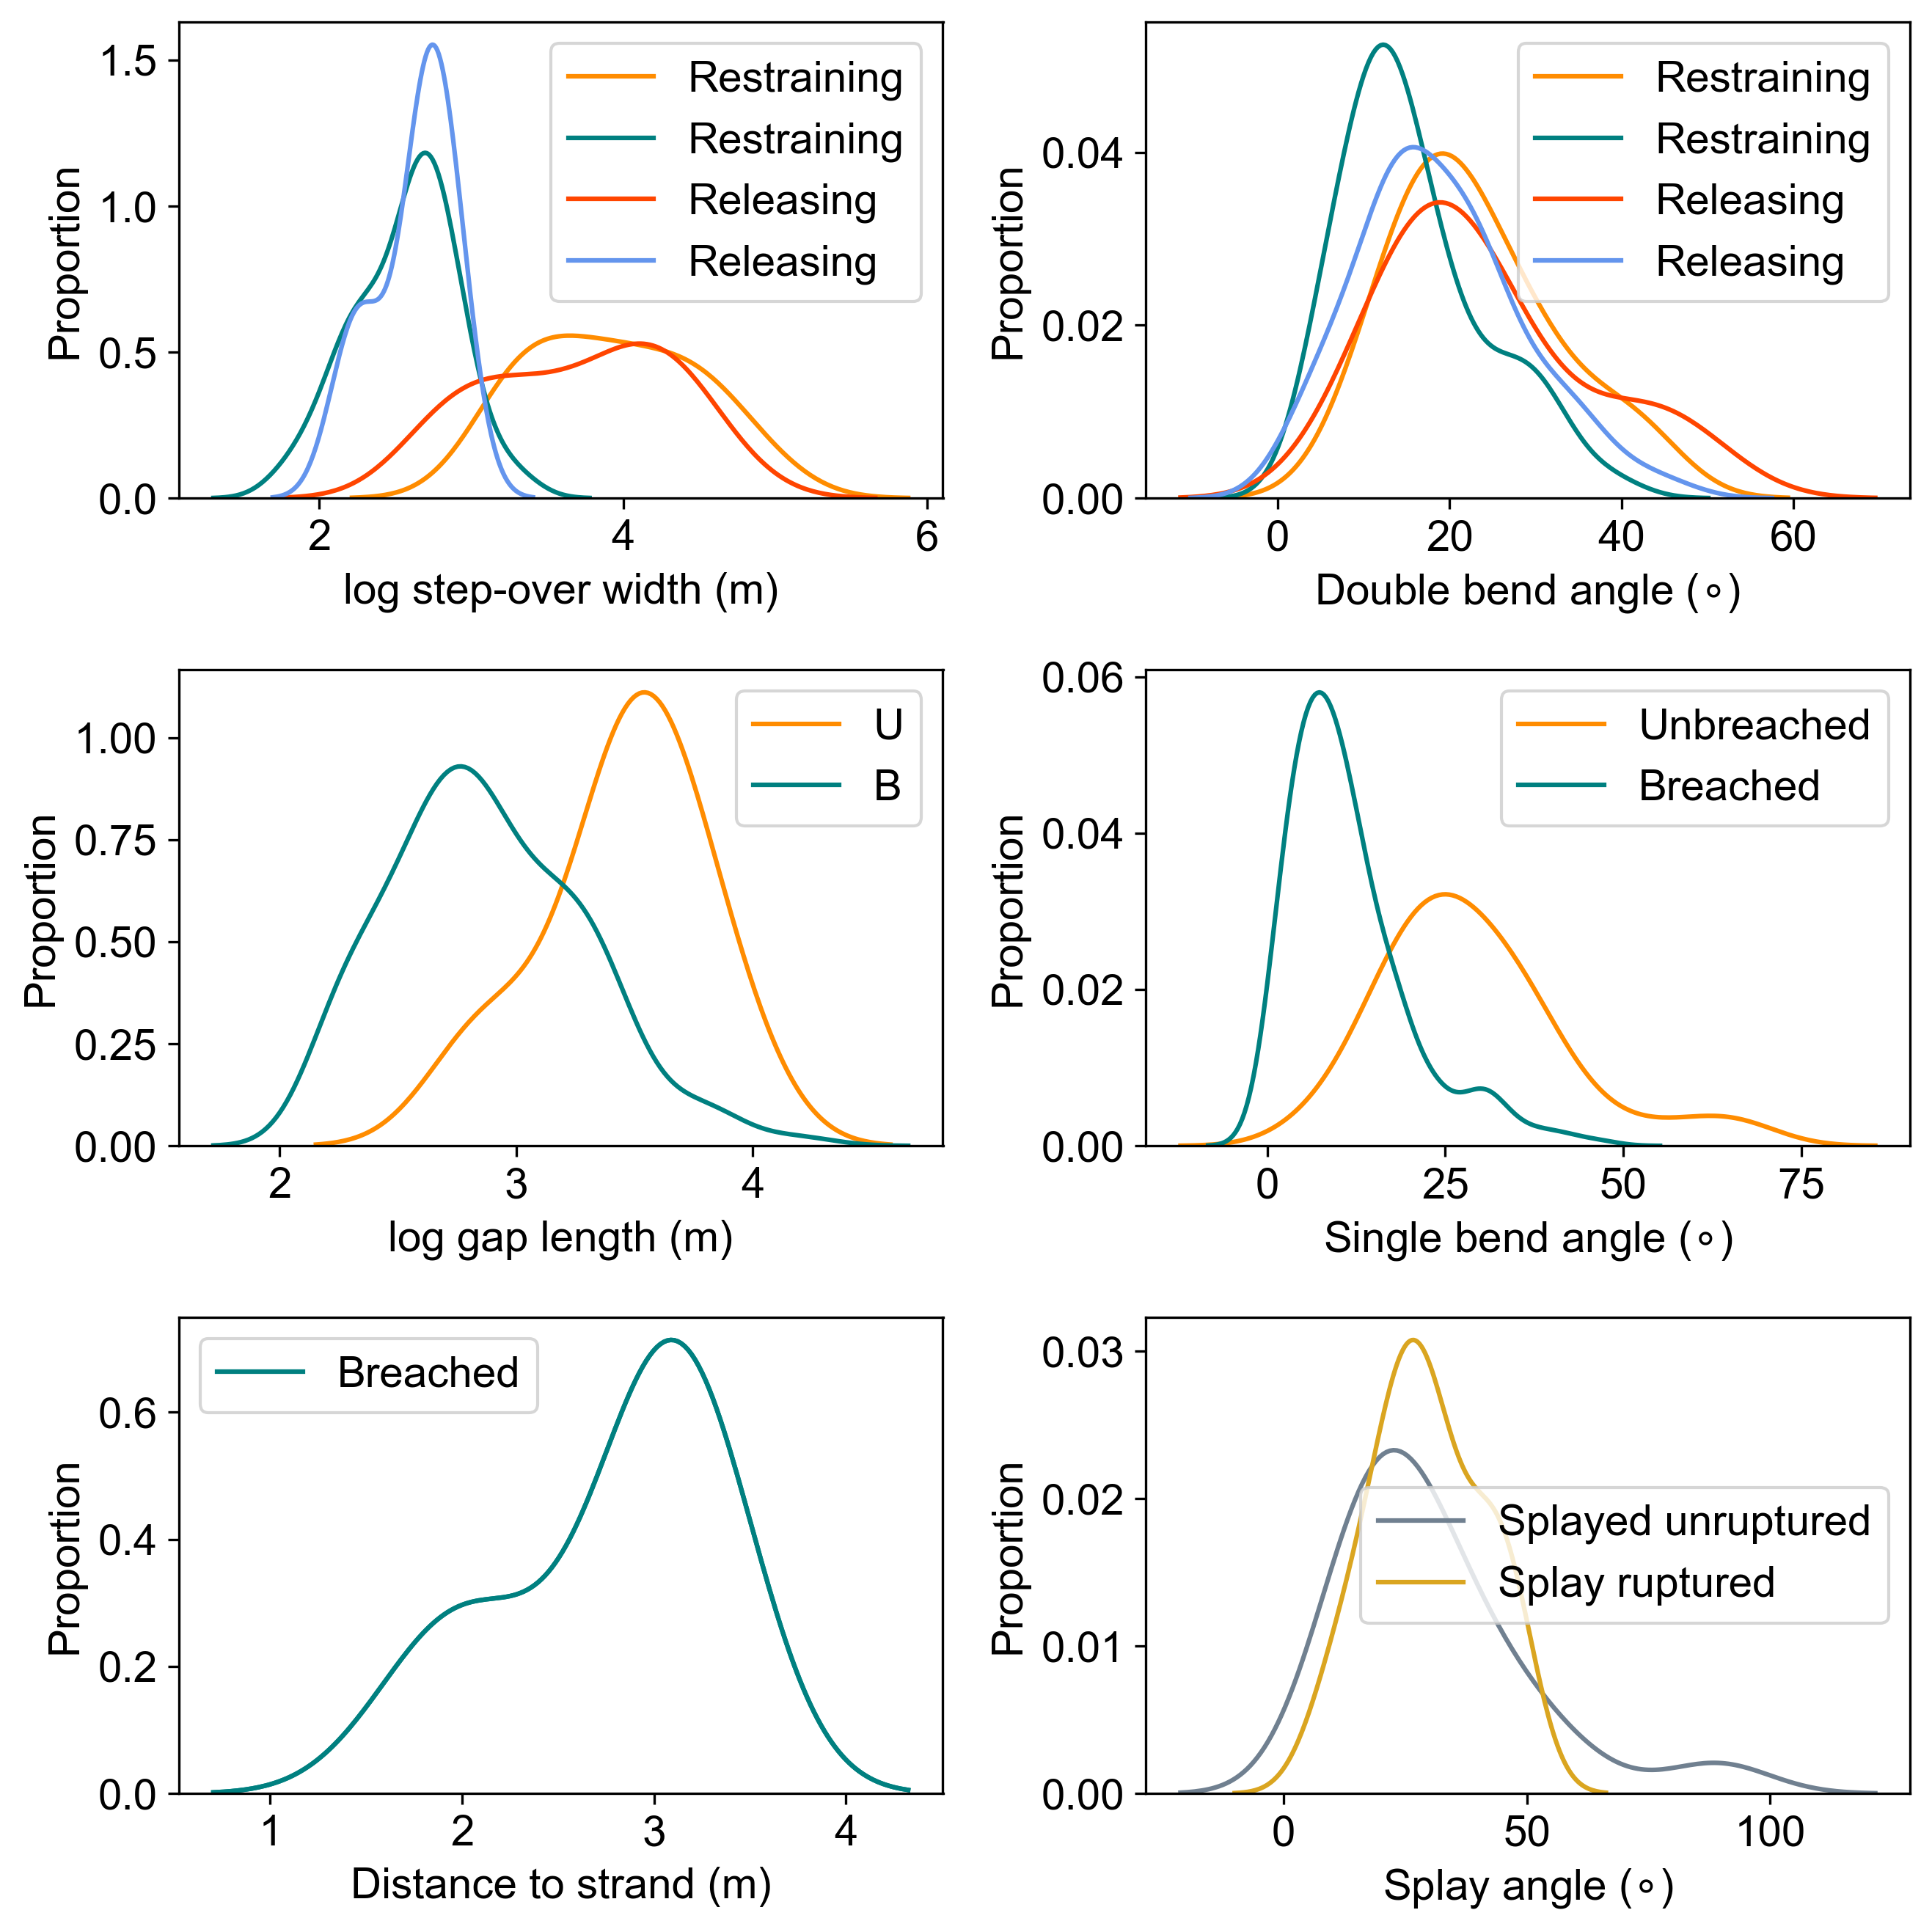

In [209]:
fig, axes = plt.subplots(3,2,figsize=(9,9))

build_pdf(grouped,'stepover', 'restraining', 'length', 'teal','darkorange',axes[0,0] ,'log step-over width (m)','Restraining', 'Restraining')
build_pdf(grouped,'stepover', 'releasing', 'length', 'cornflowerblue','orangered',axes[0,0] , 'log step-over width (m)','Releasing', 'Releasing')
build_pdf(grouped,'bend', 'restraining', 'angle','teal','darkorange',axes[0,1] ,'Double bend angle ($\circ$)','Restraining', 'Restraining')
build_pdf(grouped,'bend', 'releasing', 'angle', 'cornflowerblue','orangered',axes[0,1] ,'Double bend angle ($\circ$)','Releasing', 'Releasing')
build_pdf(grouped,'gap', 'none', 'length', 'teal','darkorange',axes[1,0] , 'log gap length (m)','B', 'U')
build_pdf(grouped,'bend', 'single', 'angle', 'teal','darkorange',axes[1,1] ,'Single bend angle ($\circ$)','Breached', 'Unbreached')
build_pdf(grouped,'splay', 'none', 'angle', 'goldenrod','slategrey',axes[2,1] ,'Splay angle ($\circ$)','Splay ruptured', 'Splayed unruptured')
build_pdf(grouped,'strand', 'none', 'length', 'teal','teal',axes[2,0] ,'Distance to strand (m)','Breached', '')
plt.tight_layout()
plt.savefig('GRL/PDFs.pdf')
plt.show()



ks tests

In [210]:
# ks test for populations of earthquake gates
double_bend_ks = kstest_variables(grouped,'bend', 'double', 'angle')
print('double_bend_ks')
print(double_bend_ks)

single_bend_ks = kstest_variables(grouped,'bend', 'single', 'angle')
print('single_bend_ks')
print(single_bend_ks)

stepover_ks= kstest_variables(grouped,'stepover', 'none', 'length')
print('stepover_ks')
print(stepover_ks)

gap_ks = kstest_variables(grouped,'gap', '', 'length')
print('gap_ks')
print(gap_ks)

splay_ks = kstest_variables(grouped,'splay', 'none', 'angle')
print('splay_ks')
print(splay_ks)

releasing_restraining_unbreached_bend_ks = kstest_variables(grouped,'bend', 'releasing_restraining_unbreached', 'angle')
print('releasing_restraining_unbreached_bend_ks')
print(releasing_restraining_unbreached_bend_ks)

releasing_restraining_breached_bend_ks = kstest_variables(grouped,'bend', 'releasing_restraining_breached', 'angle')
print('releasing_restraining_breached_bend_ks')
print(releasing_restraining_breached_bend_ks)

releasing_restraining_breached_stepover_ks = kstest_variables(grouped,'stepover', 'releasing_restraining_breached', 'length')
print('releasing_restraining_breached_stepover_ks')
print(releasing_restraining_breached_stepover_ks)

releasing_restraining_unbreached_stepover_ks = kstest_variables(grouped,'stepover', 'releasing_restraining_unbreached', 'length')
print('releasing_restraining_unbreached_stepover_ks')
print(releasing_restraining_unbreached_stepover_ks)

double_bend_ks
KstestResult(statistic=0.33171912832929784, pvalue=0.00378467783829588, statistic_location=14.5462313088188, statistic_sign=1)
single_bend_ks
KstestResult(statistic=0.696360518292683, pvalue=2.6794066187000626e-17, statistic_location=15.6935103227513, statistic_sign=1)
stepover_ks
KstestResult(statistic=0.875, pvalue=3.8957760474679895e-14, statistic_location=3.0036662138676324, statistic_sign=1)
gap_ks
KstestResult(statistic=0.7043010752688172, pvalue=0.0023598899422008755, statistic_location=3.3156138688628625, statistic_sign=1)
splay_ks
KstestResult(statistic=0.19731800766283525, pvalue=0.6938316758450852, statistic_location=25.8837228358785, statistic_sign=-1)
releasing_restraining_unbreached_bend_ks
KstestResult(statistic=0.15808823529411764, pvalue=0.9508095003277803, statistic_location=18.5685515277188, statistic_sign=1)
releasing_restraining_breached_bend_ks
KstestResult(statistic=0.2653907496012759, pvalue=0.03051603331495705, statistic_location=14.0183033402183

# Plot passing probabilities and earthquake gate analysis

Logistic models

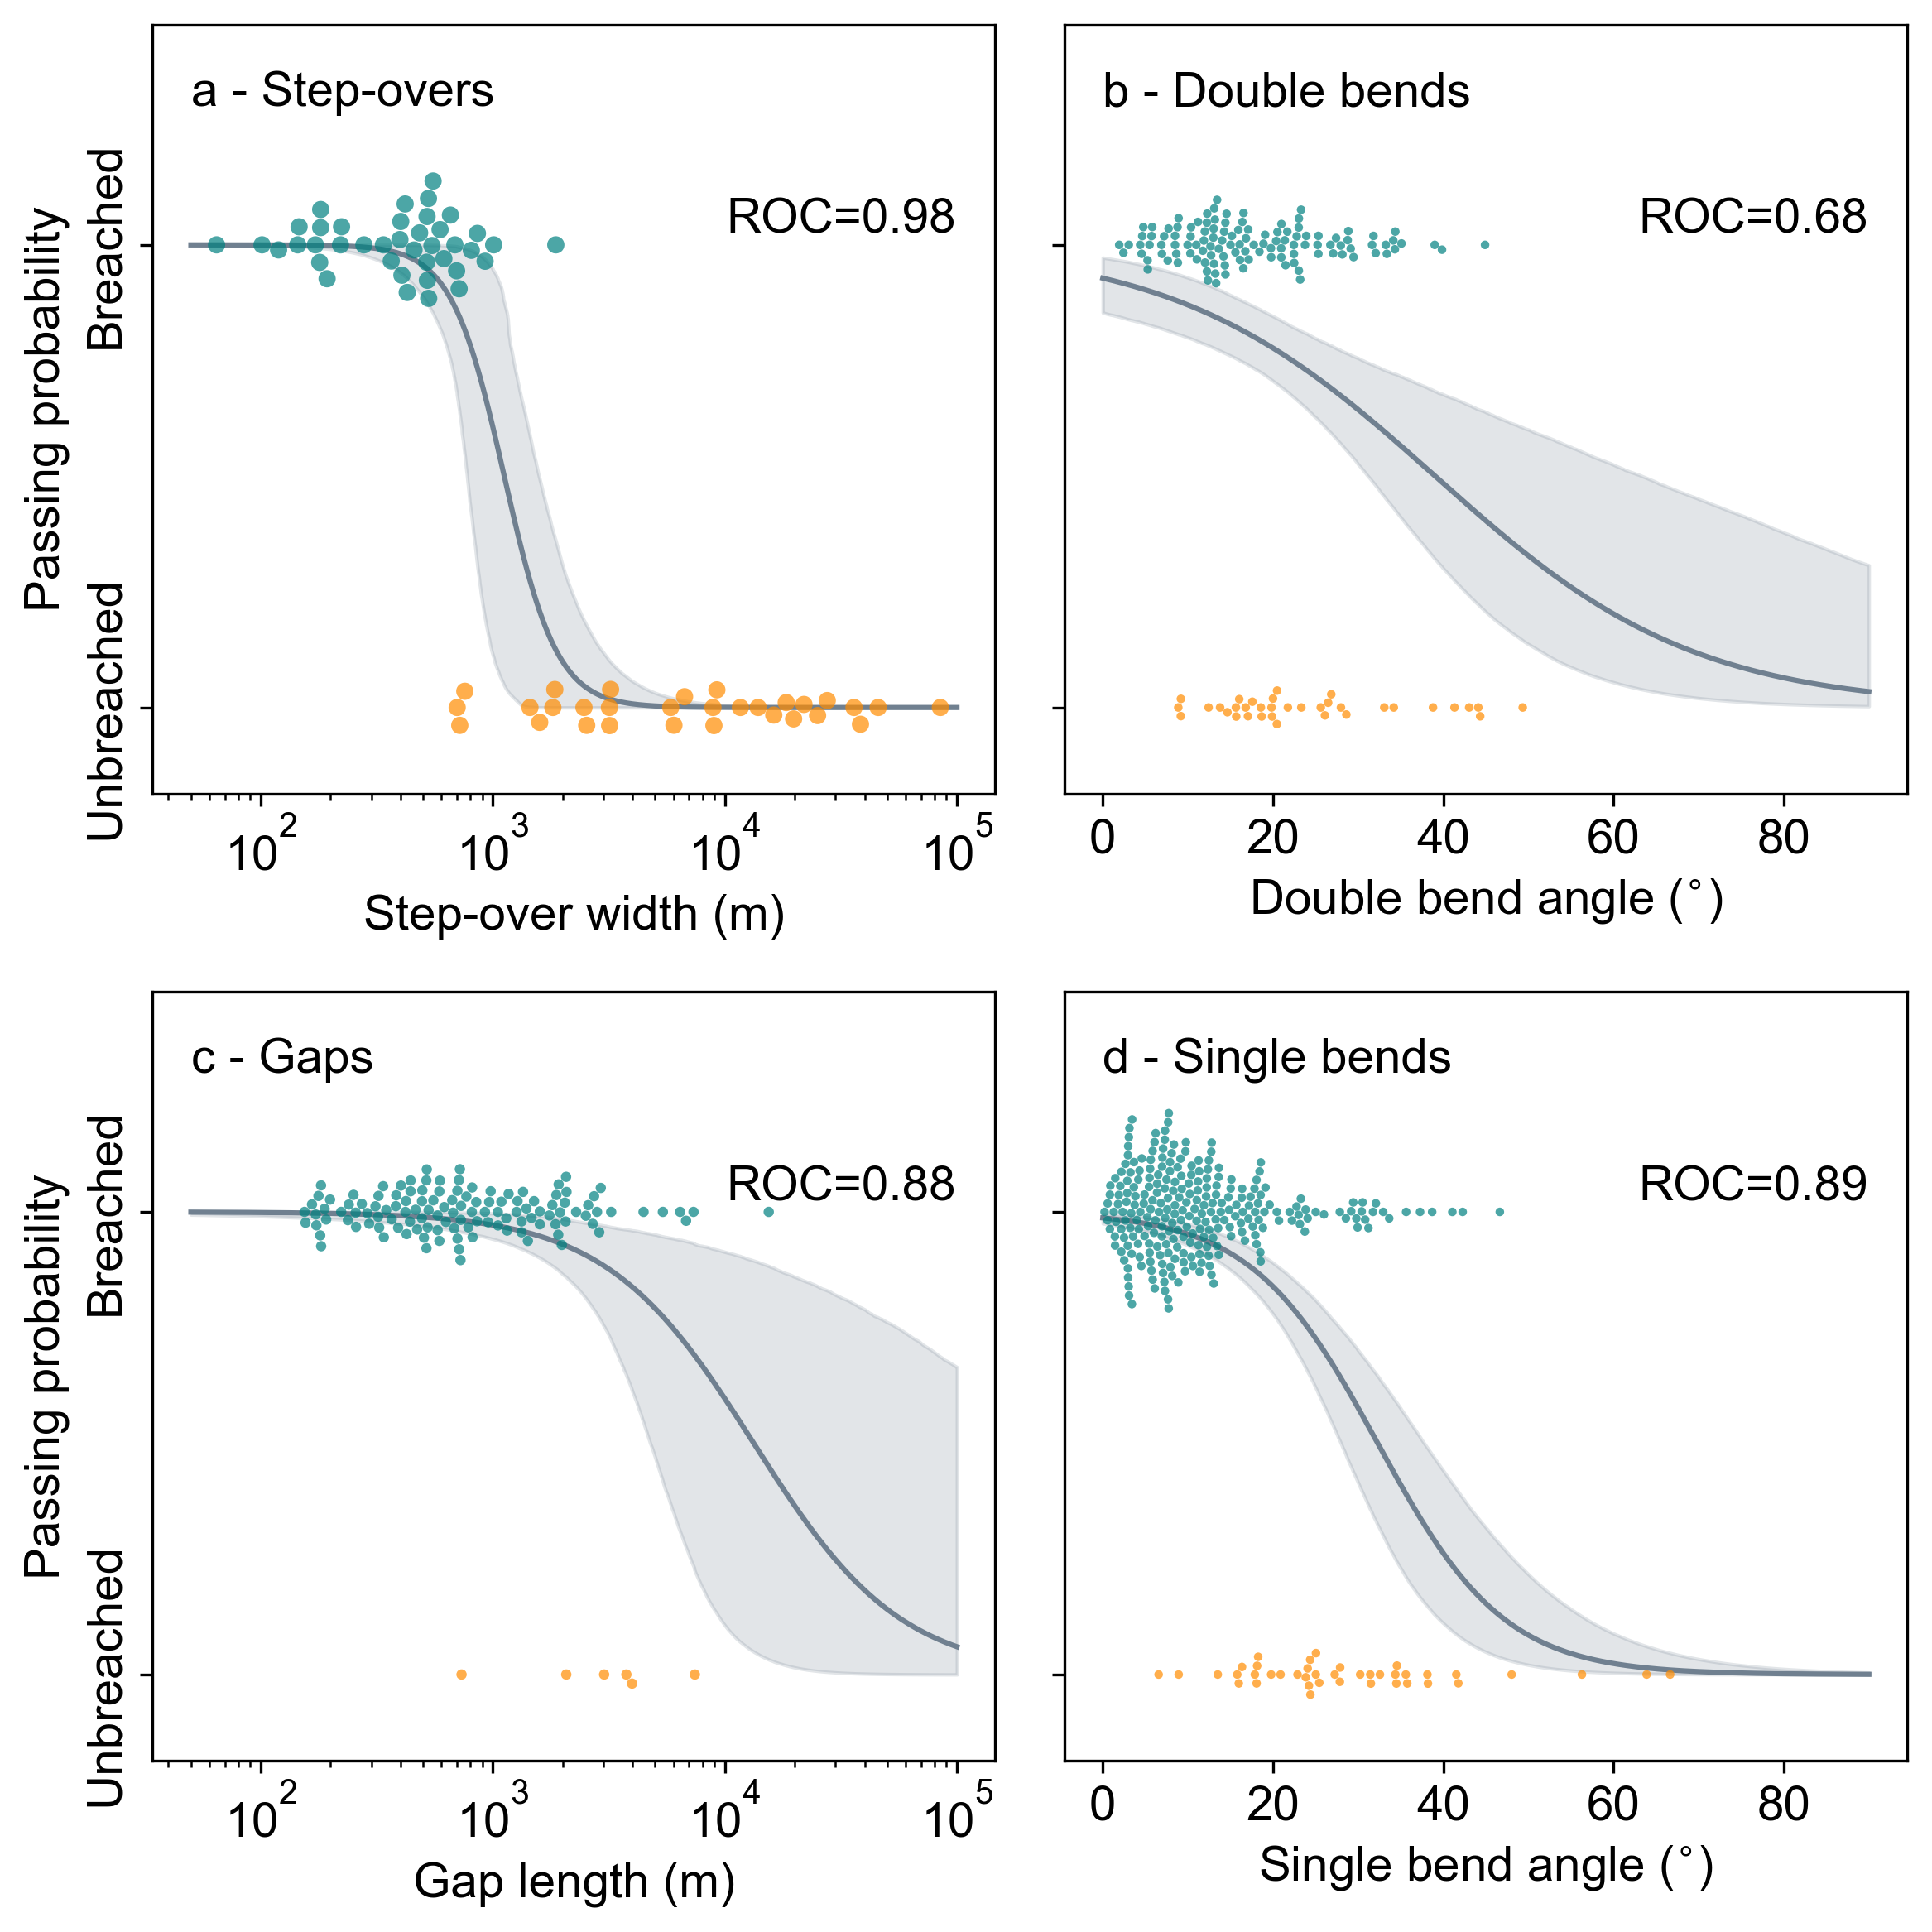

In [211]:
fig, axes = plt.subplots(2,2,figsize=(8,8), sharey=True, dpi=300)
 
log_stepover, acc_stepover, pre_stepover, f1_stepover, roc_stepover, confusion_matrix_stepover, BUbin_stepover,xstepover = build_logistic_regression(
    grouped,
    'stepover', 
    'none', 
    'length', 
    None, 
    axes[0,0],
    50,
    100000,
    'slategrey',
    'Step-over width (m)',
    5
)

log_bend_double, acc_bend_double, pre_bend_double, f1_bend_double, roc_bend_double, confusion_matrix_bend_double,BUbin_bend_double,xbenddouble= build_logistic_regression(grouped,'bend', 'double', 'angle',None,axes[0,1],0,90,'slategrey','Double bend angle ($^{\circ}$)',2.5)
log_bend_single, acc_bend_single, pre_bend_single, f1_bend_single, roc_bend_single, confusion_matrix_bend_single,BUbin_bend_single,xbendsingle = build_logistic_regression(grouped,'bend', 'single', 'angle', None,
                                                                                                                                                                           axes[1,1],0,90,'slategrey','Single bend angle ($^{\circ}$)',2.5)

log_gap, acc_gap, pre_gap, f1_gap, roc_gap, confusion_matrix_gap, BUbin_gap,xgap = build_logistic_regression(grouped,'gap', 'none', 'length', None, axes[1,0],50,100000,'slategrey','Gap length (m)',3)


# add labels
axes[0,0].text(50,-0.3,'a - Step-overs',fontsize=14)
axes[0,1].text(0,-0.3,'b - Double bends',fontsize=14)
axes[1,0].text(50,-0.3,'c - Gaps',fontsize=14)
axes[1,1].text(0,-0.3,'d - Single bends',fontsize=14)

plt.tight_layout()
plt.savefig('GRL/PP_EQgates.pdf')
plt.show()

logistic regression for releasing and restraining subgroups

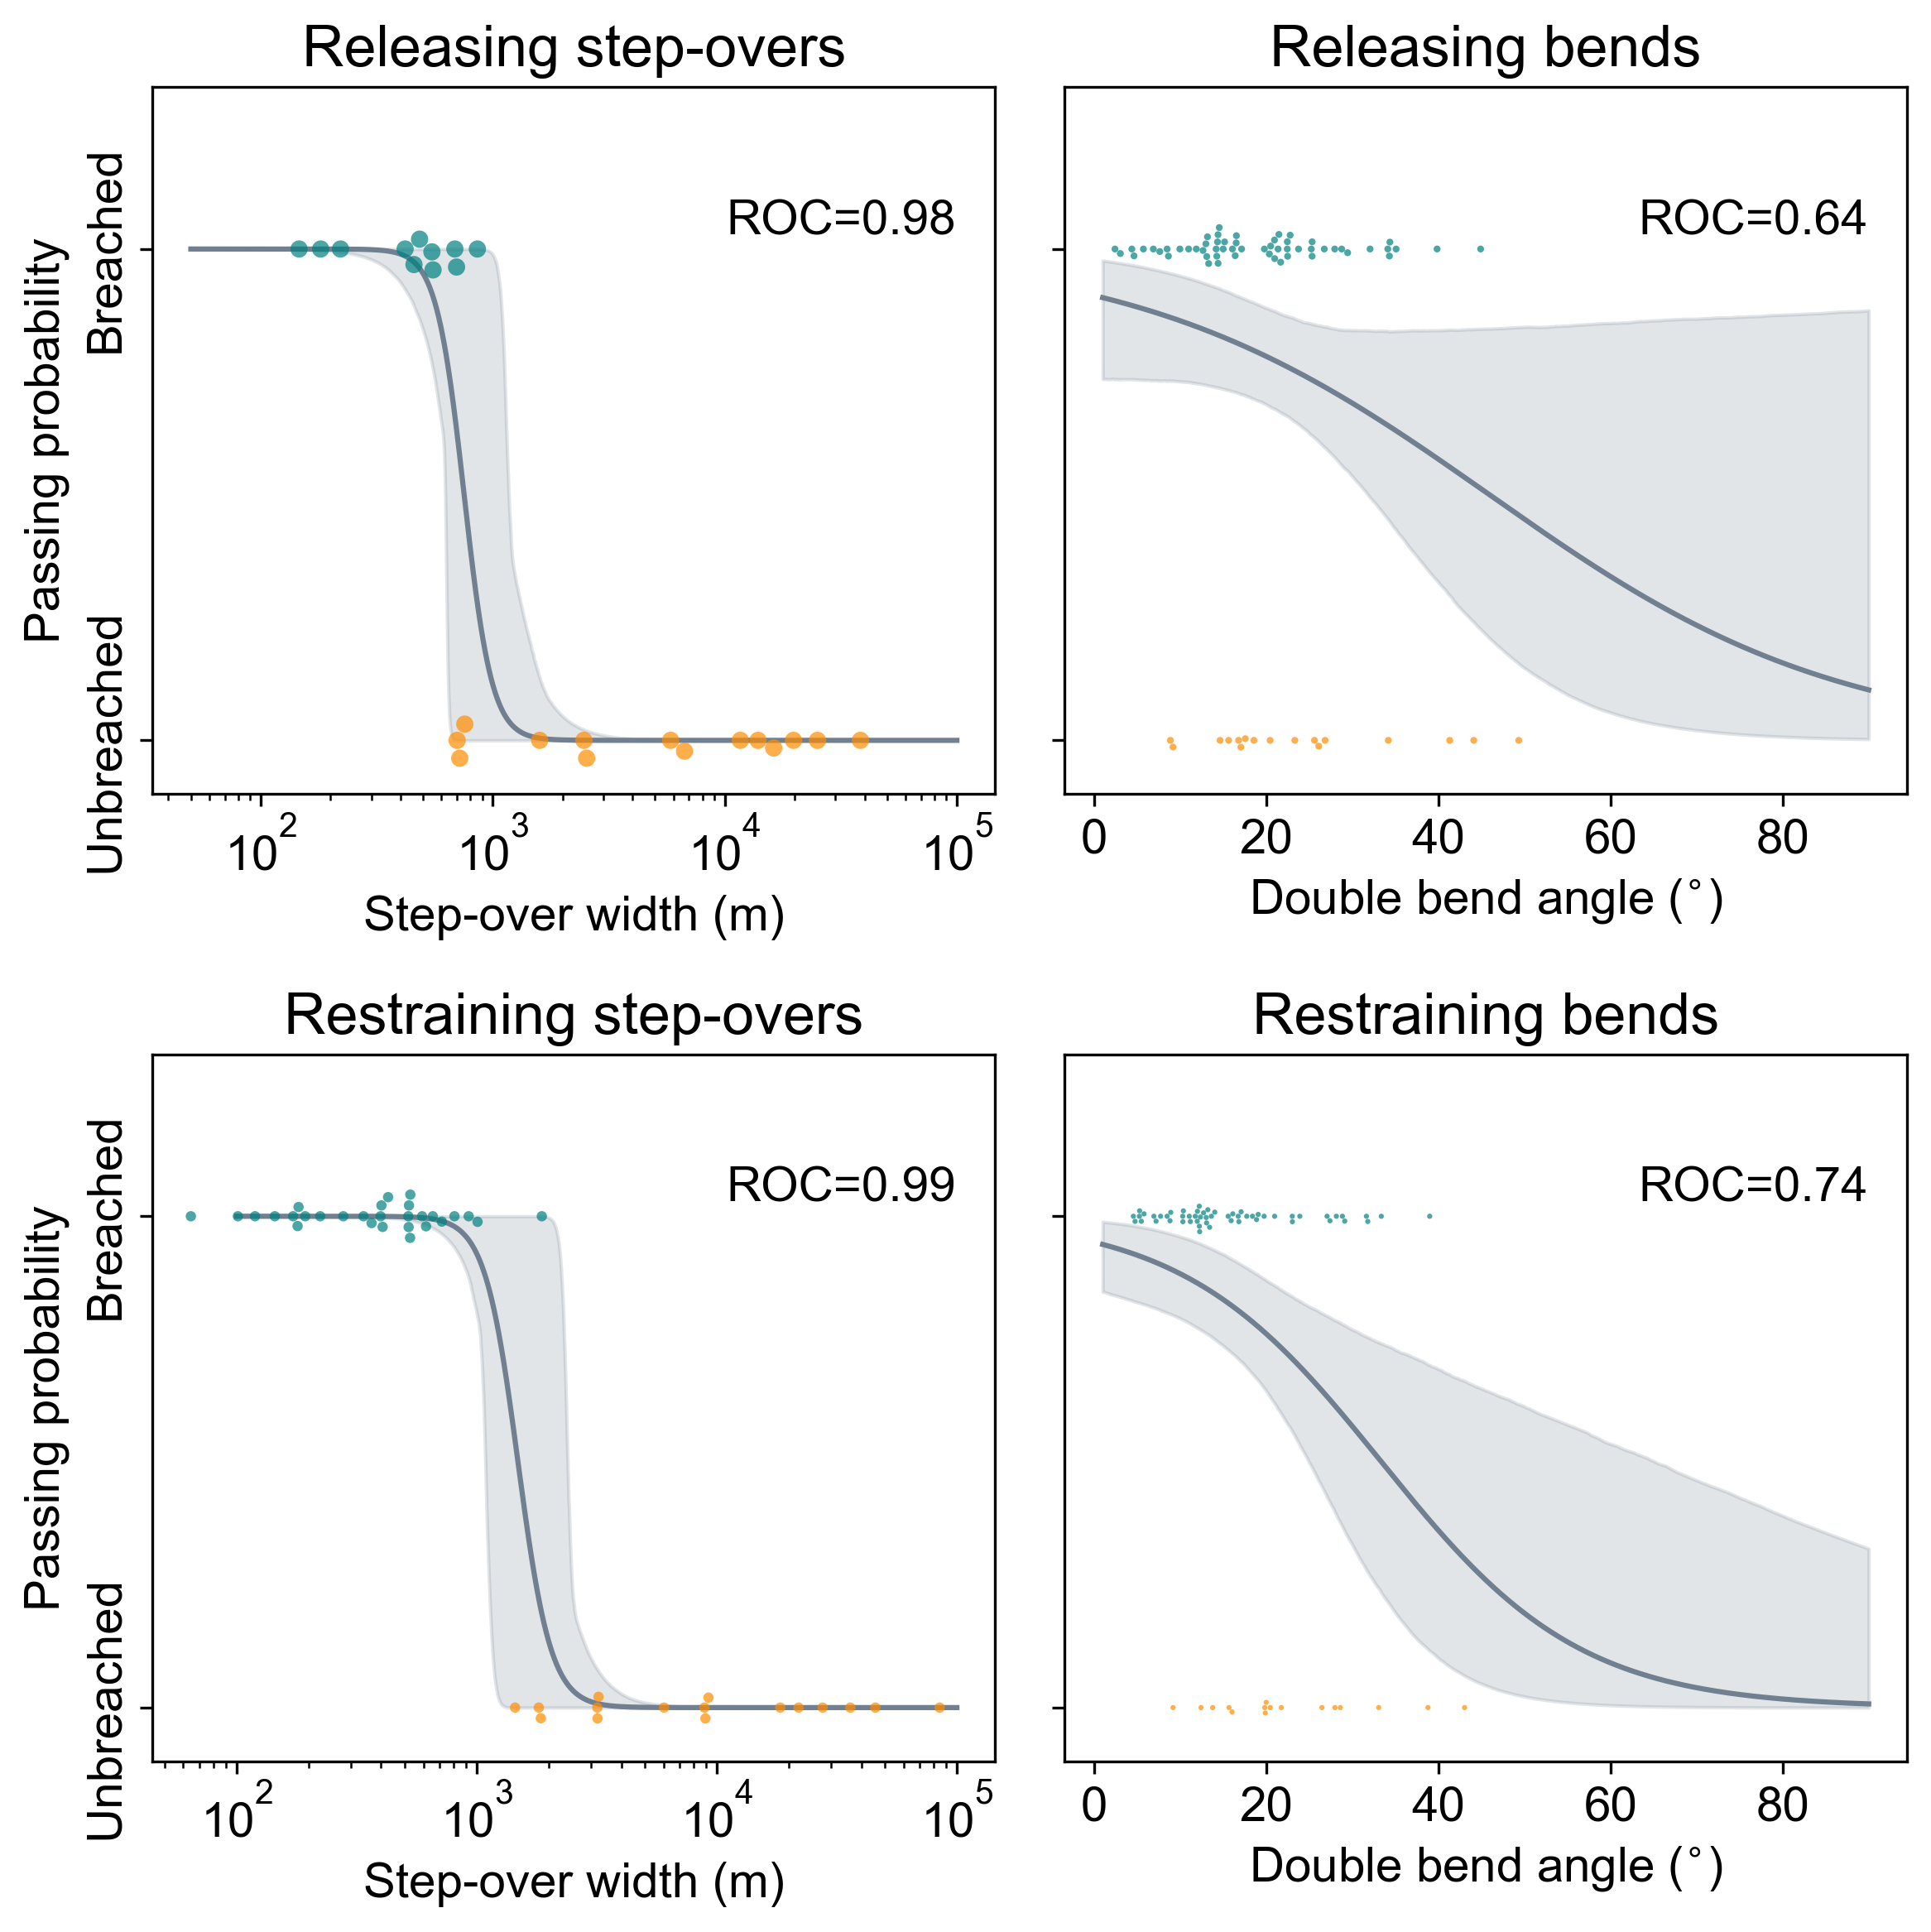

In [212]:
fig, axes = plt.subplots(2,2,figsize=(8,8), sharey=True, dpi=300)
 
build_logistic_regression(
    grouped,
    'stepover', 
    'releasing', 
    'length', 
    None, 
    axes[0,0],
    50,
    100000,
    'slategrey',
    'Step-over width (m)',
    5
)

build_logistic_regression(grouped,'bend', 'releasing', 'angle', None,
                         axes[0,1],1,90,'slategrey','Double bend angle ($^{\circ}$)',2)
build_logistic_regression(grouped,'bend', 'restraining', 'angle', None, 
                         axes[1,1],1,90,'slategrey','Double bend angle ($^{\circ}$)',1.5)
build_logistic_regression(grouped,'stepover', 'restraining', 'length', None, 
                          axes[1,0],100,100000,'slategrey','Step-over width (m)',3)

axes[0,0].set_title('Releasing step-overs')
axes[0,1].set_title('Releasing bends')
axes[1,1].set_title('Restraining bends')
axes[1,0].set_title('Restraining step-overs')

plt.tight_layout()
plt.savefig('GRL/PP_EQgates_RR_categories.pdf')
plt.show()

Predict probability for earthquake gate of given geometry based on logistic model for that type of earthquake gate

In [213]:
x = np.atleast_2d(45).T
#x = np.atleast_2d(np.log10(13000)).T
proba = log_bend_double.predict_proba(x)[:,0]
proba

array([0.40382005])

Let's assess the quality of the logistic regressions. 

In [214]:
print("ROC step-over",roc_stepover)
print("ROC single bend",roc_bend_single)
print("ROC double bend",roc_bend_double)
print("ROC gap",roc_gap)

ROC step-over 0.9833333333333333
ROC single bend 0.8910060975609756
ROC double bend 0.6777239709443099
ROC gap 0.8776881720430108


### double bend/step-over proxy analysis

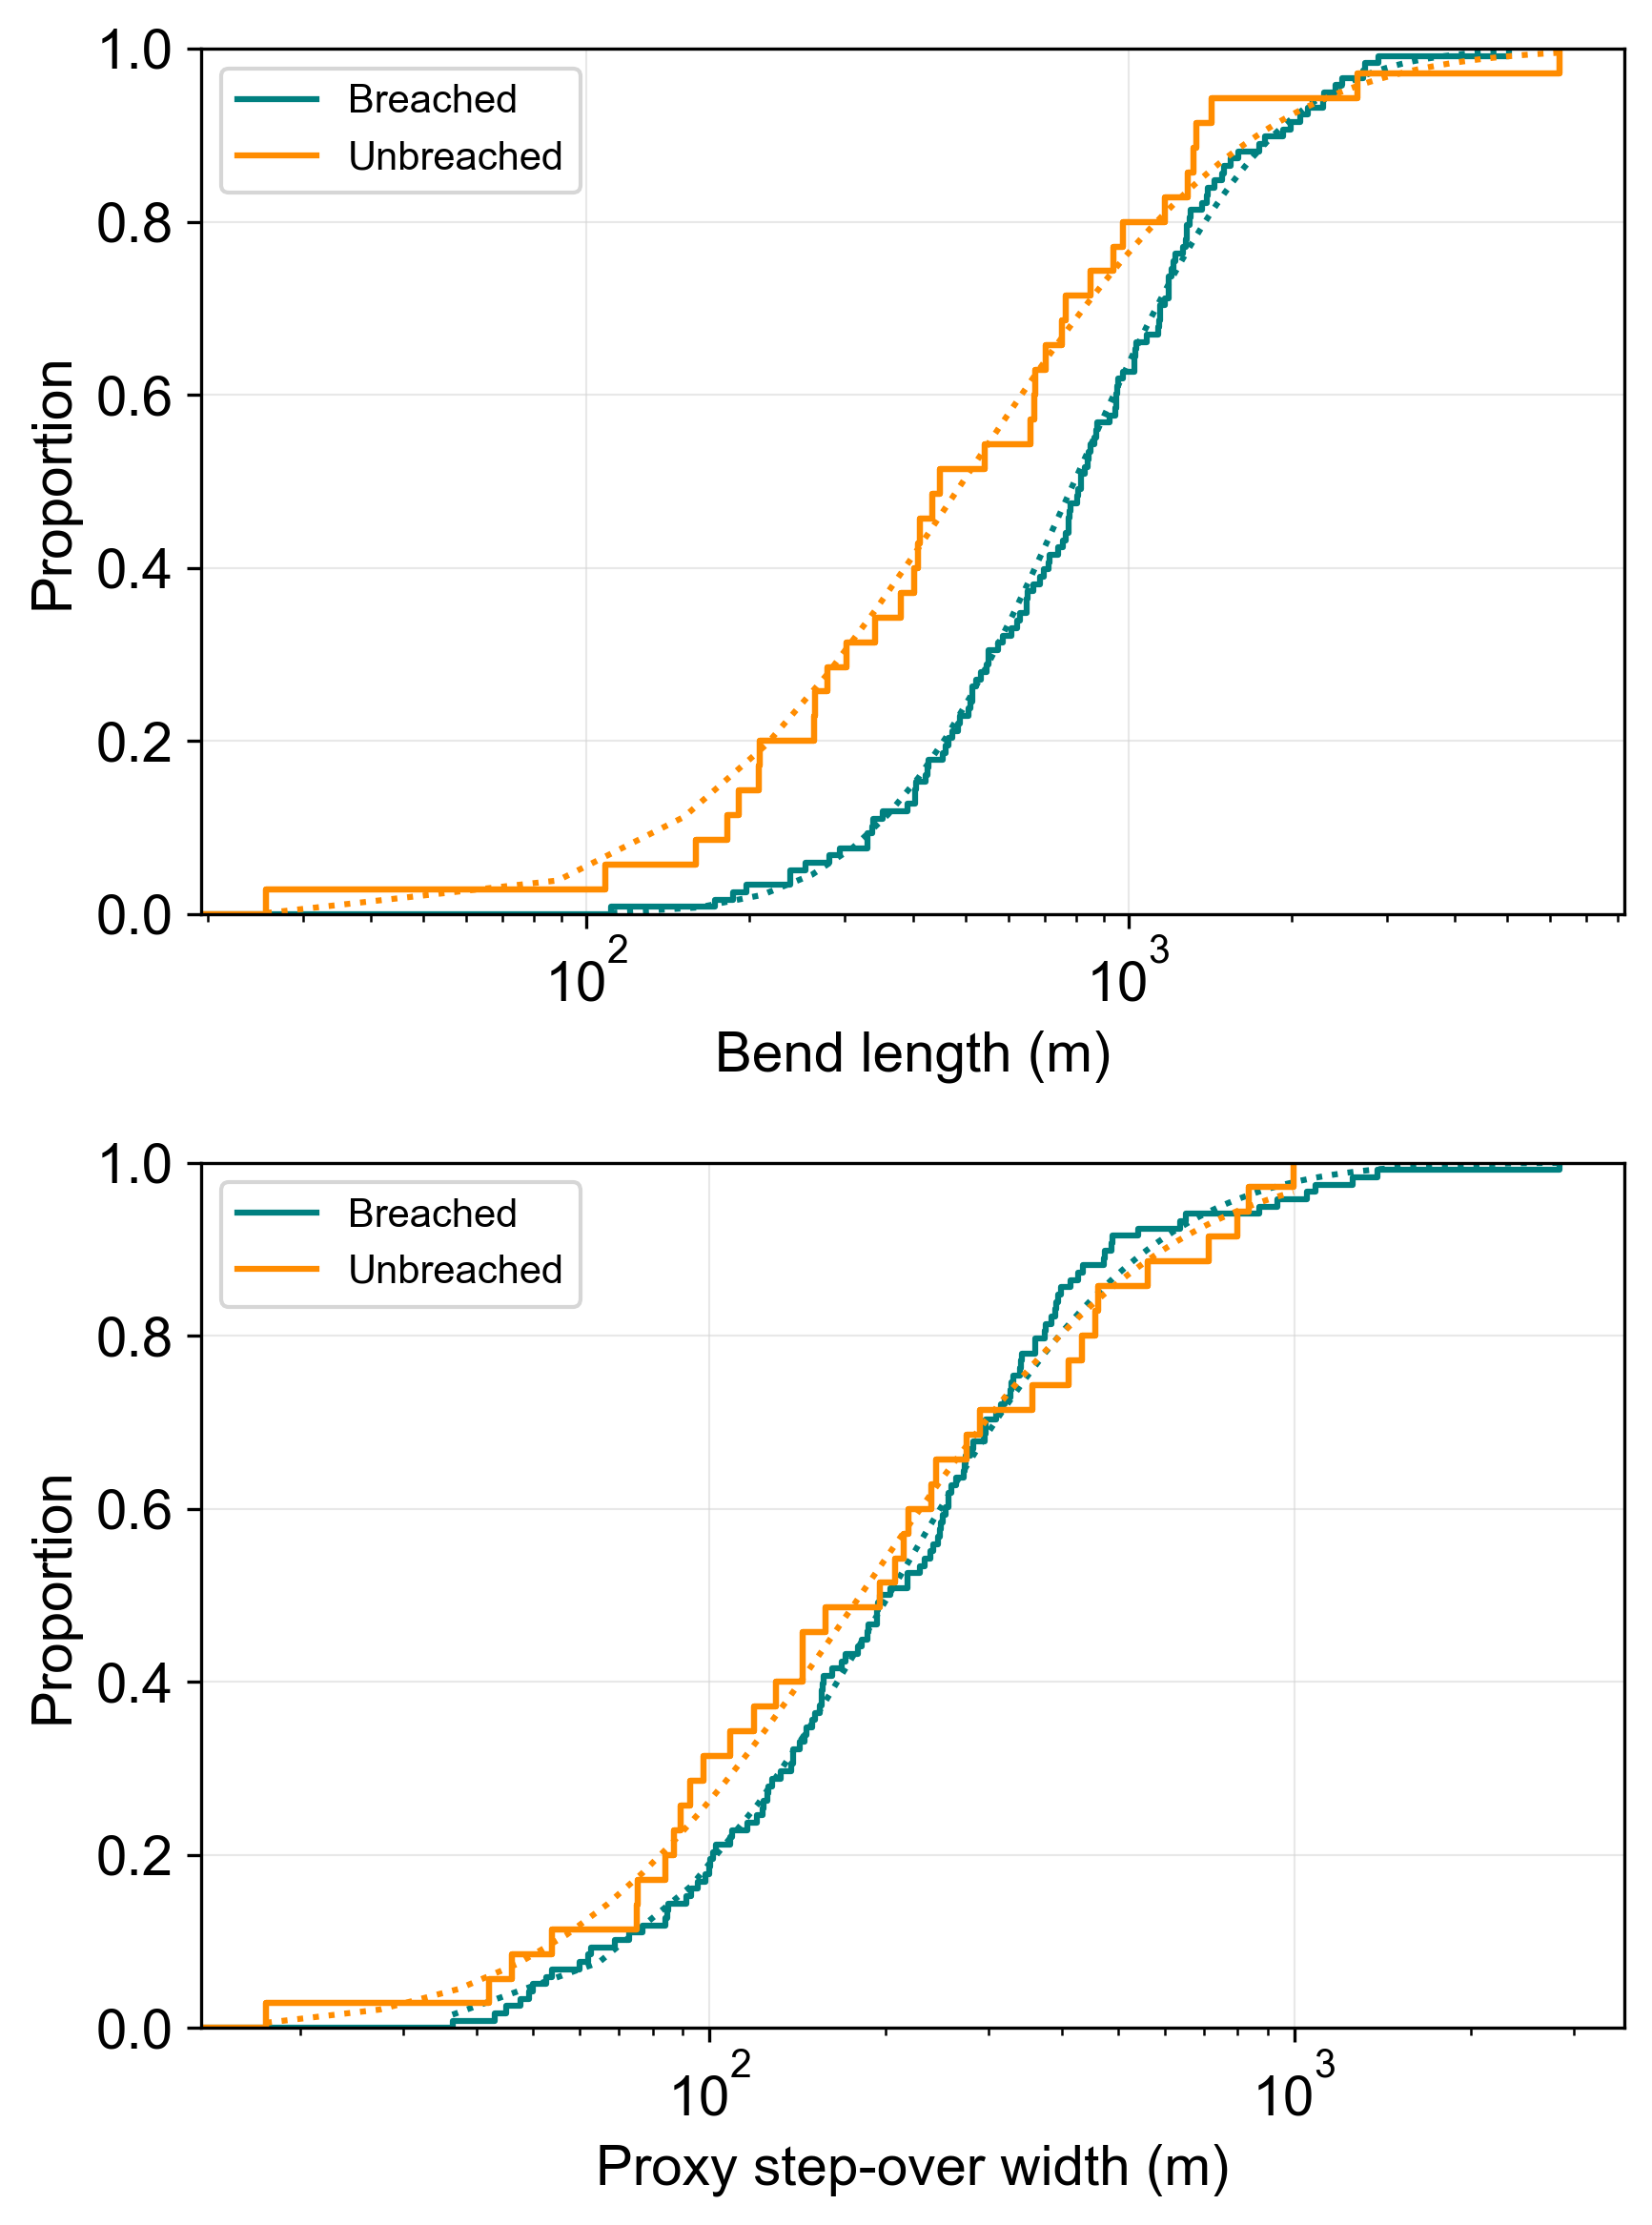

In [215]:
fig, ax = plt.subplots(2,1,figsize=(6,8), dpi=300)
build_cdf_bend_lengths(grouped,'bend', 'double', 'Distance splay or double bend (m)', 'teal','darkorange',ax[0],'Bend length (m)','Breached', 'Unbreached')
build_cdf_bend_lengths(grouped,'bend', 'double', 'Spacing double bend (m)', 'teal','darkorange',ax[1],'Proxy step-over width (m)','Breached', 'Unbreached')
plt.tight_layout()
plt.savefig('GRL/bend_length_CDFs.pdf')

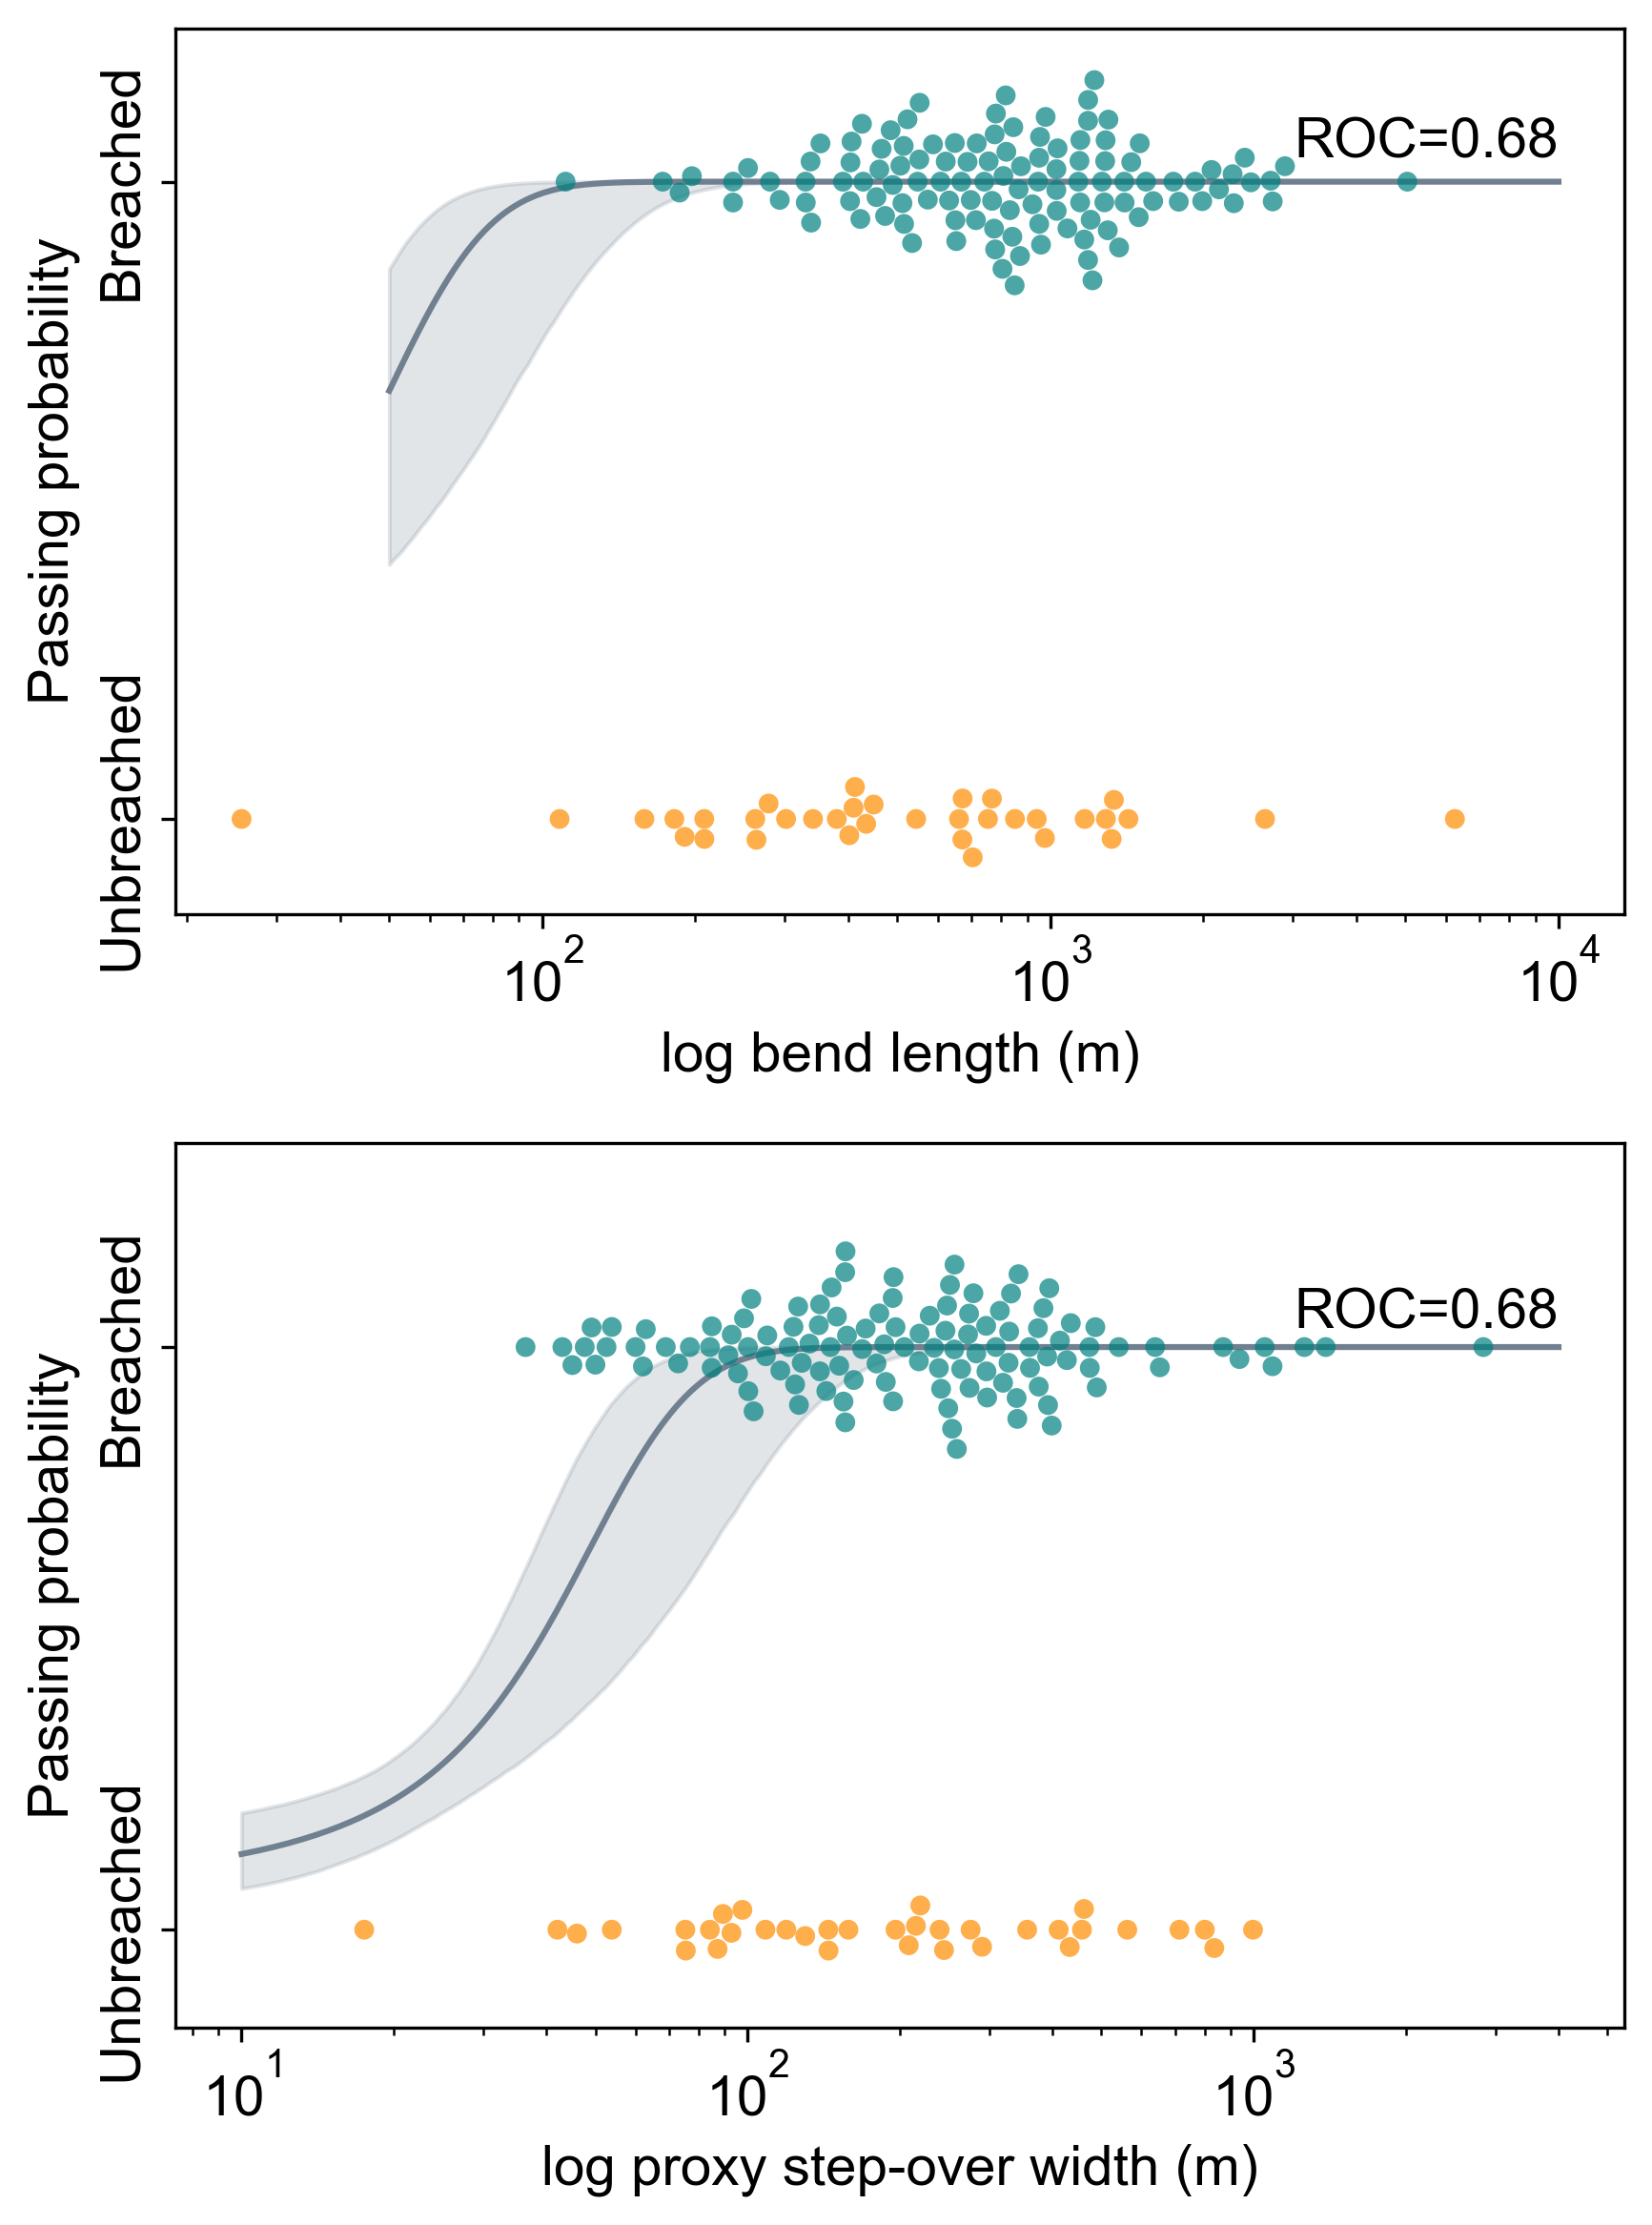

In [216]:
fig, ax = plt.subplots(2,1,figsize=(6,8), dpi=300)
build_regression_double_bend_length(grouped,'bend', 'double', 'Distance splay or double bend (m)',ax[0],50,10000,'log bend length (m)',5)
build_regression_double_bend_length(grouped,'bend', 'double', 'Spacing double bend (m)',ax[1],10,4000,'log proxy step-over width (m)',5)
plt.tight_layout()
plt.savefig('GRL/bend_lengths.pdf.pdf')

Confusion matrices to evaluate logistic model fit

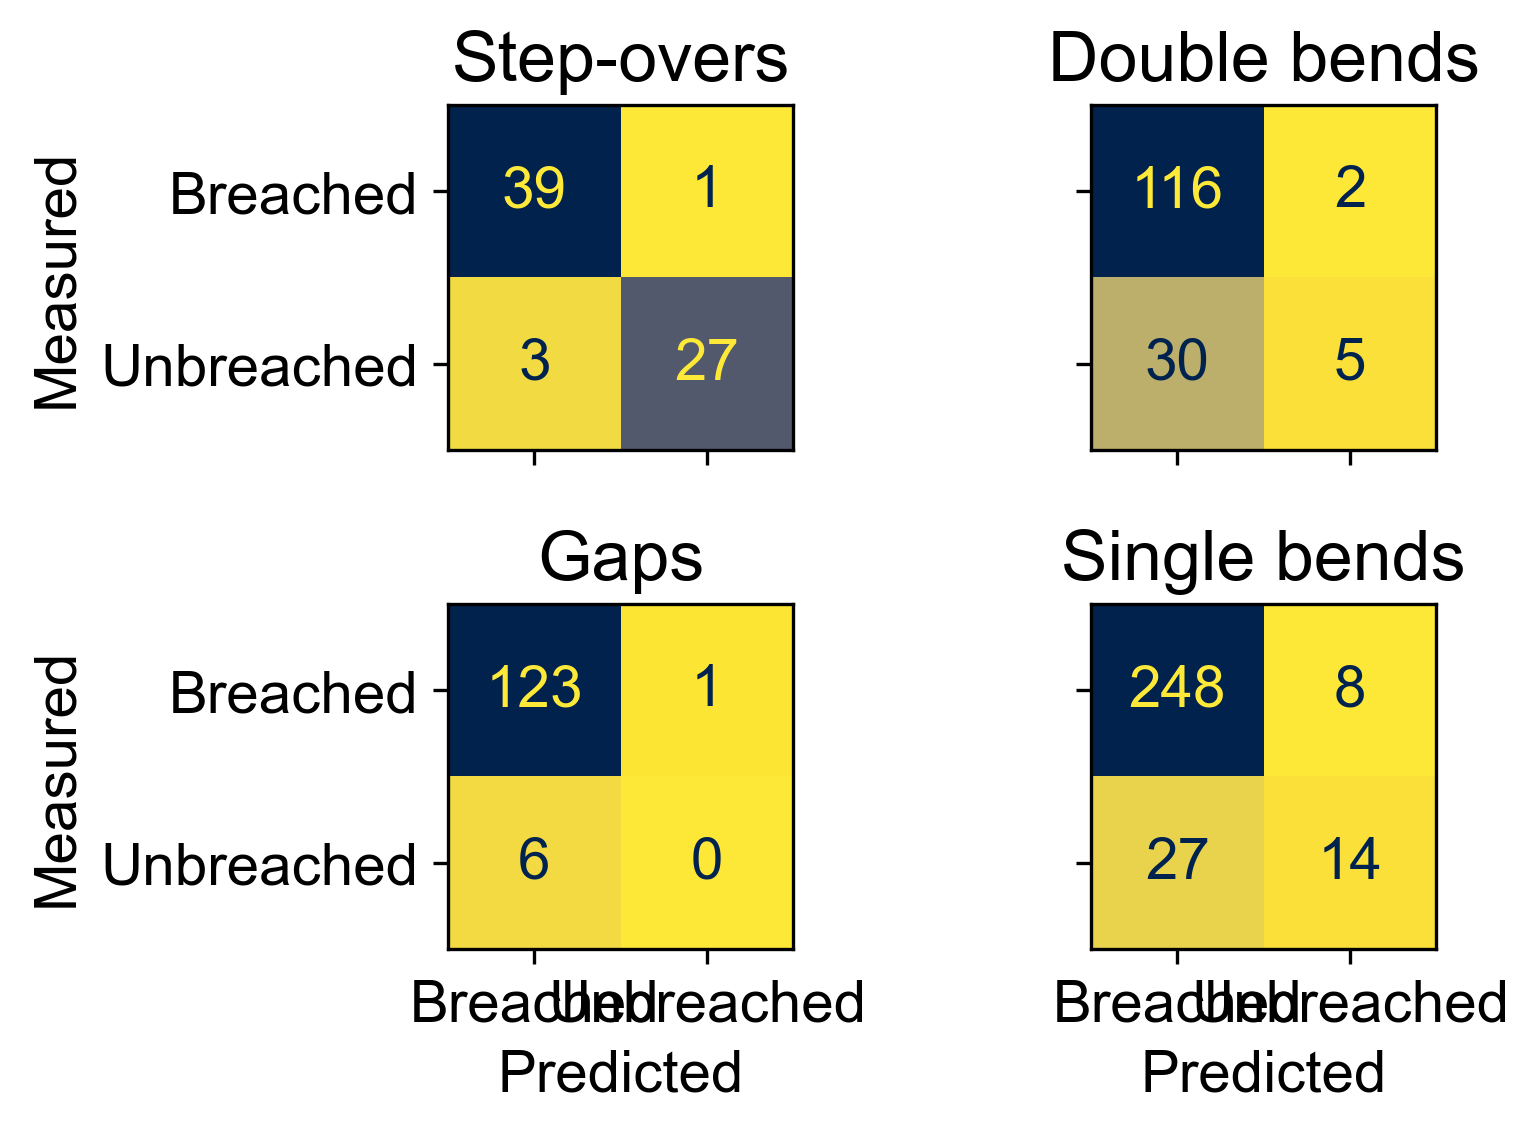

In [217]:
fig, axes = plt.subplots(2,2,figsize=(6,4), dpi=300,sharex=True,sharey=True)

# getting the original colormap using cm.get_cmap() function
orig_map=plt.cm.get_cmap('cividis')
labels = ['Breached', 'Unbreached']
  
# reversing the original colormap using reversed() function
reversed_map = orig_map.reversed()

disp_stepover = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_stepover,display_labels=labels)
disp_stepover.plot(cmap=reversed_map, include_values=True,colorbar=False,ax = axes[0,0])
axes[0,0].set_title('Step-overs')
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('Measured')

disp_double_bend = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_bend_double,display_labels=labels)
disp_double_bend.plot(cmap=reversed_map, include_values=True,colorbar=False,ax = axes[0,1])
axes[0,1].set_title('Double bends')
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('')

disp_double_single = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_bend_single,display_labels=labels)
disp_double_single.plot(cmap=reversed_map, include_values=True,colorbar=False,ax = axes[1,1])
axes[1,1].set_title('Single bends')
axes[1,1].set_xlabel('Predicted')
axes[1,1].set_ylabel('')

disp_gap = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_gap,display_labels=labels)
disp_gap.plot(cmap=reversed_map, include_values=True,colorbar=False,ax = axes[1,0])
axes[1,0].set_title('Gaps')
axes[1,0].set_xlabel('Predicted')
axes[1,0].set_ylabel('Measured')

plt.tight_layout()
plt.savefig('GRL/confusion_matrices.pdf')
plt.show()


# Analysis of earthquake likelihood and surface rupture length

Extract passing probability for all mapped gates based on logistic models:
-- Note gaps, splays (statiscally indifferent), and strands are all assigned probabilities of 1 given the do not influence rupture propagation

In [218]:
fun_dict = {
    'log_stepover' : log_stepover,  
    'log_bend_single': log_bend_single,
    'log_bend_double':log_bend_double,
    'log_gap': log_gap
}

PR = []

for i in range(len(data)): 
    datai = data.iloc[i]
    featurei = datai['Feature']
    RRi = datai['Type (releasing or restraining)']

    if featurei == 'bend':
        RRi = datai['Type (releasing or restraining)']
        RRstr = str(RRi)

        if RRstr == 'nan':
            name_select = 'log' + '_' + 'bend' + '_' + 'single'
            extract = fun_dict[name_select]
            x = np.atleast_2d(datai['Length (m) or angle (deg)']).T
            PRi  = extract.predict_proba(x)[:,0]

        else:
            name_select = 'log' + '_' + 'bend' + '_' + 'double'
            extract = fun_dict[name_select]
            x = np.atleast_2d(datai['Length (m) or angle (deg)']).T
            PRi  = extract.predict_proba(x)[:,0]

    # elif featurei == 'gap':
    #     strlog = 'log'
    #     name_select = strlog + '_' + 'gap' 
    #     extract = fun_dict[name_select]
    #     x = np.atleast_2d(datai['Length (m) or angle (deg)']).T
    #     PRi  = extract.predict_proba(np.log10(x))[:,0]

    elif featurei == 'stepover': 
        featurestr = str(featurei)
        strlog = 'log'
        RRstr = str(RRi)
        name_select = strlog + '_' + featurestr 
        extract = fun_dict[name_select]
        x = np.atleast_2d(datai['Length (m) or angle (deg)']).T
        PRi  = extract.predict_proba(np.log10(x))[:,0]
    
    else:
        PRi = 1
        

    PR.append(PRi)

data['PR'] = PR


Calculate earthquake likelihood for each event based on the previously estimated probabilities for each earthquake gate

In [219]:
event = data["Earthquake"]
event.unique()

mag = np.array([])
event_likelihood = np.array([])
event_group = event.unique()
SRL = np.array([])
cumdisp = np.array([])

for EQ in event_group:
    subset = data.loc[data['Earthquake'] == EQ]
    subsetb = subset.loc[subset['Breached or unbreached'] == "breached"]
    mag_i = subsetb['Magnitude']
    mag_i = mag_i.iloc[0]
    SRLi = subsetb['Total rupture length']
    SRLi = SRLi.iloc[0]
    cumdisp_i = subsetb['Cumulative displacement']
    cumdisp_i = cumdisp_i.iloc[0]

    subsetb['PR'] = subsetb['PR'].astype(float)
    subsetb['PRlog'] = np.log(subsetb['PR'])   
    event_likelihood_i = np.sum(subsetb['PRlog'])

    print(mag_i,EQ,event_likelihood_i,SRLi)

    event_likelihood = np.append(event_likelihood, event_likelihood_i)
    mag = np.append(mag,mag_i)
    SRL = np.append(SRL,SRLi)
    cumdisp = np.append(cumdisp,cumdisp_i)

7.7 Balochistan -7.1326148687285995 199115.277475184
6.63 Borrego -4.066218938146179 31546.4857015686
6.19 ChalfantValley -0.34155312301520296 14207.5427349576
7.0 Darfield -1.86041068976687 28896.3939931895
7.9 Denali -7.980517658061071 278702.916265388
7.14 Duzce -2.7818613880149257 40018.847231306
6.22 ElmoreRanch -0.32070848413583986 8899.97956202332
5.2 GalwayLake -0.7024888067166153 6900.28452126802
7.13 HectorMine -2.9022948355168157 48174.1492813072
6.4 Hualien -1.0652119088230467 7305.71812073165
6.95 Imperial1940 -0.4935045996879255 60614.751301348
6.53 Imperial1979 -1.0927866597352667 32653.1156479598
7.51 Izmit_Kocaeli -2.4788708490900153 121770.934867524
6.5 IzuPeninsula -0.31752286715869277 5501.24642743068
6.9 Kobe -0.581738040453481 10101.7645342178
7.0 Kumamoto -2.240170014557818 31578.8204966148
7.28 Landers -5.324826425497144 84722.12096402
7.7 Luzon -8.269150383575933 117824.691193508
6.0 Napa -1.179215305140381 22219.9745137025
7.0 Neftegorsk -1.0495832643192418 38

In [220]:
# probability of stopping on straight segment 
n_ends_no_gates = 12
total_SRL = np.sum(SRL)
p_straight = n_ends_no_gates/total_SRL
p_continue_straight = 1-p_straight

5.928006597465145e-06


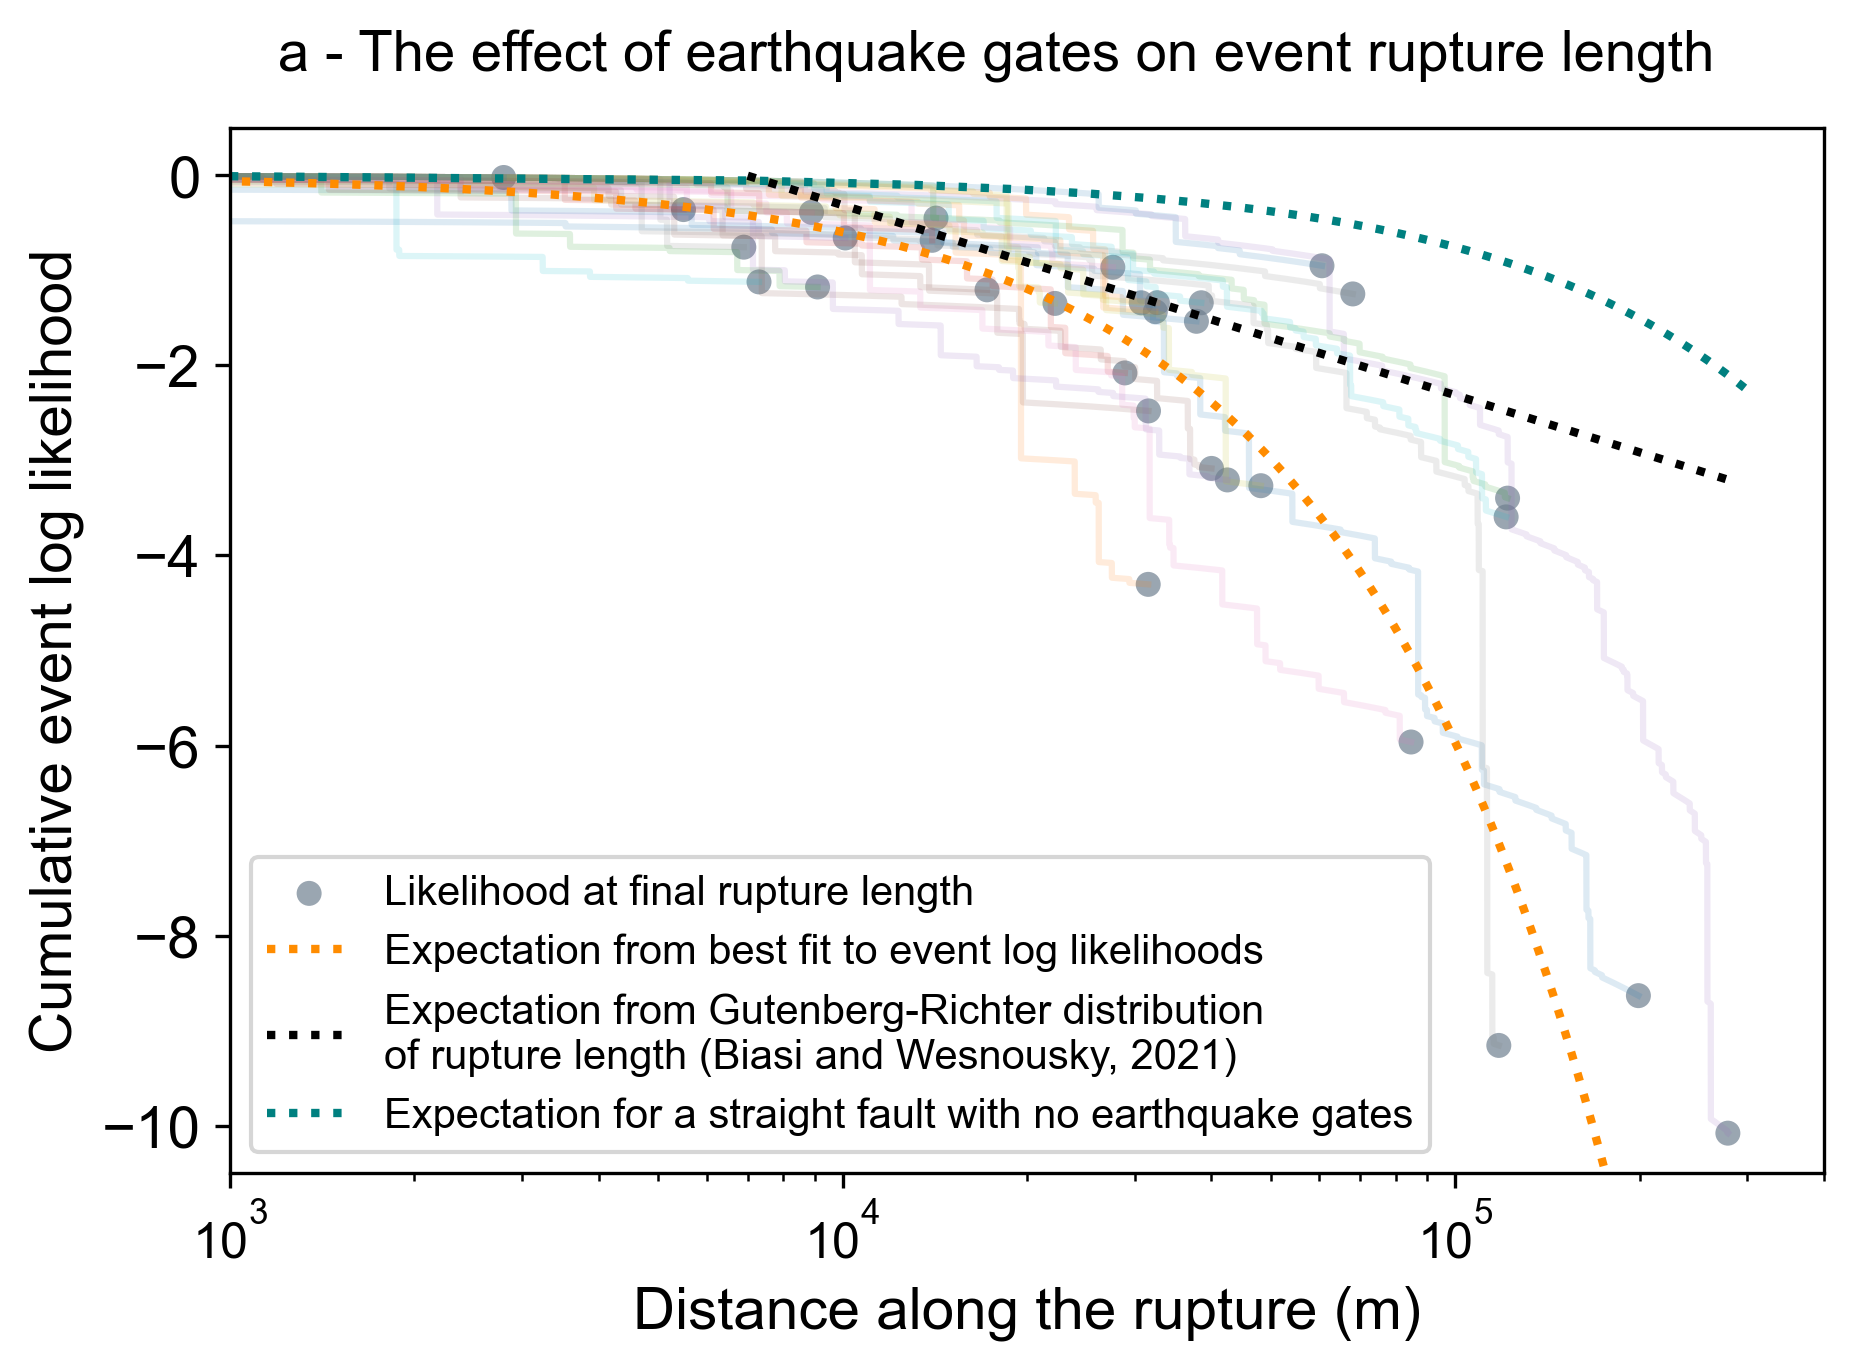

In [221]:
event_likelihood_del = event_likelihood# np.delete(event_likelihood, idx)
SRL_del = SRL#np.delete(SRL, idx)

######################################################## cumulative probability

lastpt = []
keeplikelihood = event_likelihood+np.log(p_continue_straight)*SRL
plt.figure(dpi=300)
for EQ in event_group:
    subset = data.loc[data['Earthquake'] == EQ]
    subsetb = subset.loc[subset['Breached or unbreached'] == "breached"]
    subsetb = subsetb.reset_index(drop=True)
    subsetb['PR'] = subsetb['PR'].astype(float)

    gatelikelihood = subsetb['PR']
    gateloglikelihood = np.log(subsetb['PR'])
    
    gateloc = subsetb['Location along rupture']
    subsetb['Approx_Location'] = subsetb['Location along rupture'].round().astype(int)

    SRL_event = subsetb['Total rupture length']   
    surf_length = SRL_event[0]
    surf_length = round(surf_length)
    probframe = pd.DataFrame()
    SRL_points = list(range(surf_length))
    new_rows = pd.DataFrame({'surf_length': SRL_points})
    probframe = probframe.append(new_rows, ignore_index=True)
    probframe['prob_straight_segment'] = p_continue_straight
    merged_df = pd.merge(probframe, subsetb, left_on='surf_length', right_on='Approx_Location', how='left')
    merged_df['prob'] = merged_df.apply(lambda row: row['PR'] if not pd.isnull(row['PR']) else row['prob_straight_segment'], axis=1)
    merged_df['cumulative_sum'] = np.log(merged_df['prob']).cumsum()

    lastpt.append(max(SRL_points))

    sns.lineplot(data=merged_df,x=merged_df['surf_length'],y=merged_df['cumulative_sum'],palette="blend:#7AB,#EDA",alpha=0.15) 

plt.scatter(lastpt,keeplikelihood,c='slategrey',edgecolor='none',alpha=0.7,label='Likelihood at final rupture length',linewidth=1.3)
lastpt = np.array(lastpt)
keeplikelihood = np.array(keeplikelihood)

plt.ylabel('Cumulative event log likelihood')
plt.xlabel('Distance along the rupture (m)')
plt.xlim([10**3, 400*10**3])

# fit exponential relationship through final event likelihoods
y = np.array(keeplikelihood)
slope = np.mean(y / lastpt)
x_range = np.linspace(1, max(lastpt), 1000)
y_range = slope * x_range + 0

# standard error on the slope
predicted_y =  slope * lastpt + 0
residuals = y - predicted_y
SSR = np.sum(residuals**2)
var_x = np.var(lastpt)
SE_slope = np.sqrt(SSR / ((len(lastpt) - 2) * np.sum((lastpt - np.mean(lastpt))**2)))
print(SE_slope)

plt.plot(x_range, y_range, label='Expectation from best fit to event log likelihoods', linestyle=':',linewidth=2,c='darkorange')
# r"$P_{EQ} = 10^{(%.2f \pm %.2f) %.6f \pm  %.6f(L) }$" % (all_info.intercept,all_info.intercept_stderr,all_info.slope,all_info.stderr)
plt.xscale('log')

plt.tick_params(axis='x', labelsize=12)
plt.text(1200,1.1,'a - The effect of earthquake gates on event rupture length',fontsize=13.5)

# add Gutenberg-Richter prediction
GR_ratio = np.log10(np.array([1, 0.246, 0.110, 0.062, 0.040, 0.028, 0.020, 0.016, 0.012]))  # from Biasi and Wesnousky, 2021
SRL_GR = np.array([7, 14, 21, 28, 35, 42, 49, 56, 63])  # from Biasi and Wesnousky, 2021
# fit pwl through GR data in Table 1 of Biasi and Wesnousky, 2021
popt, pcov = curve_fit(power_law, SRL_GR*10**3, GR_ratio)
xfit = np.linspace(min(SRL_GR*10**3),max(lastpt), 10000)
yfit = power_law(xfit, *popt)
lgnd_string = r'Expectation from Gutenberg-Richter distribution' + '\n' + 'of rupture length (Biasi and Wesnousky, 2021)'
plt.plot(xfit, yfit, label=lgnd_string,linestyle=':',linewidth=2,c='black')

# add straight fault prediction
SRL_range = np.linspace(1000,3*10**5)
p_straight_fault = np.log(p_continue_straight)*SRL_range
plt.plot(SRL_range, p_straight_fault, label='Expectation for a straight fault with no earthquake gates', linestyle=':',linewidth=2,c='teal')
plt.legend(fontsize=10)
plt.ylim(-10.5,0.5)
plt.tight_layout()
plt.savefig('GRL/SRL_likelihood.pdf')
plt.show()


# Earthquake gates along rupture analysis

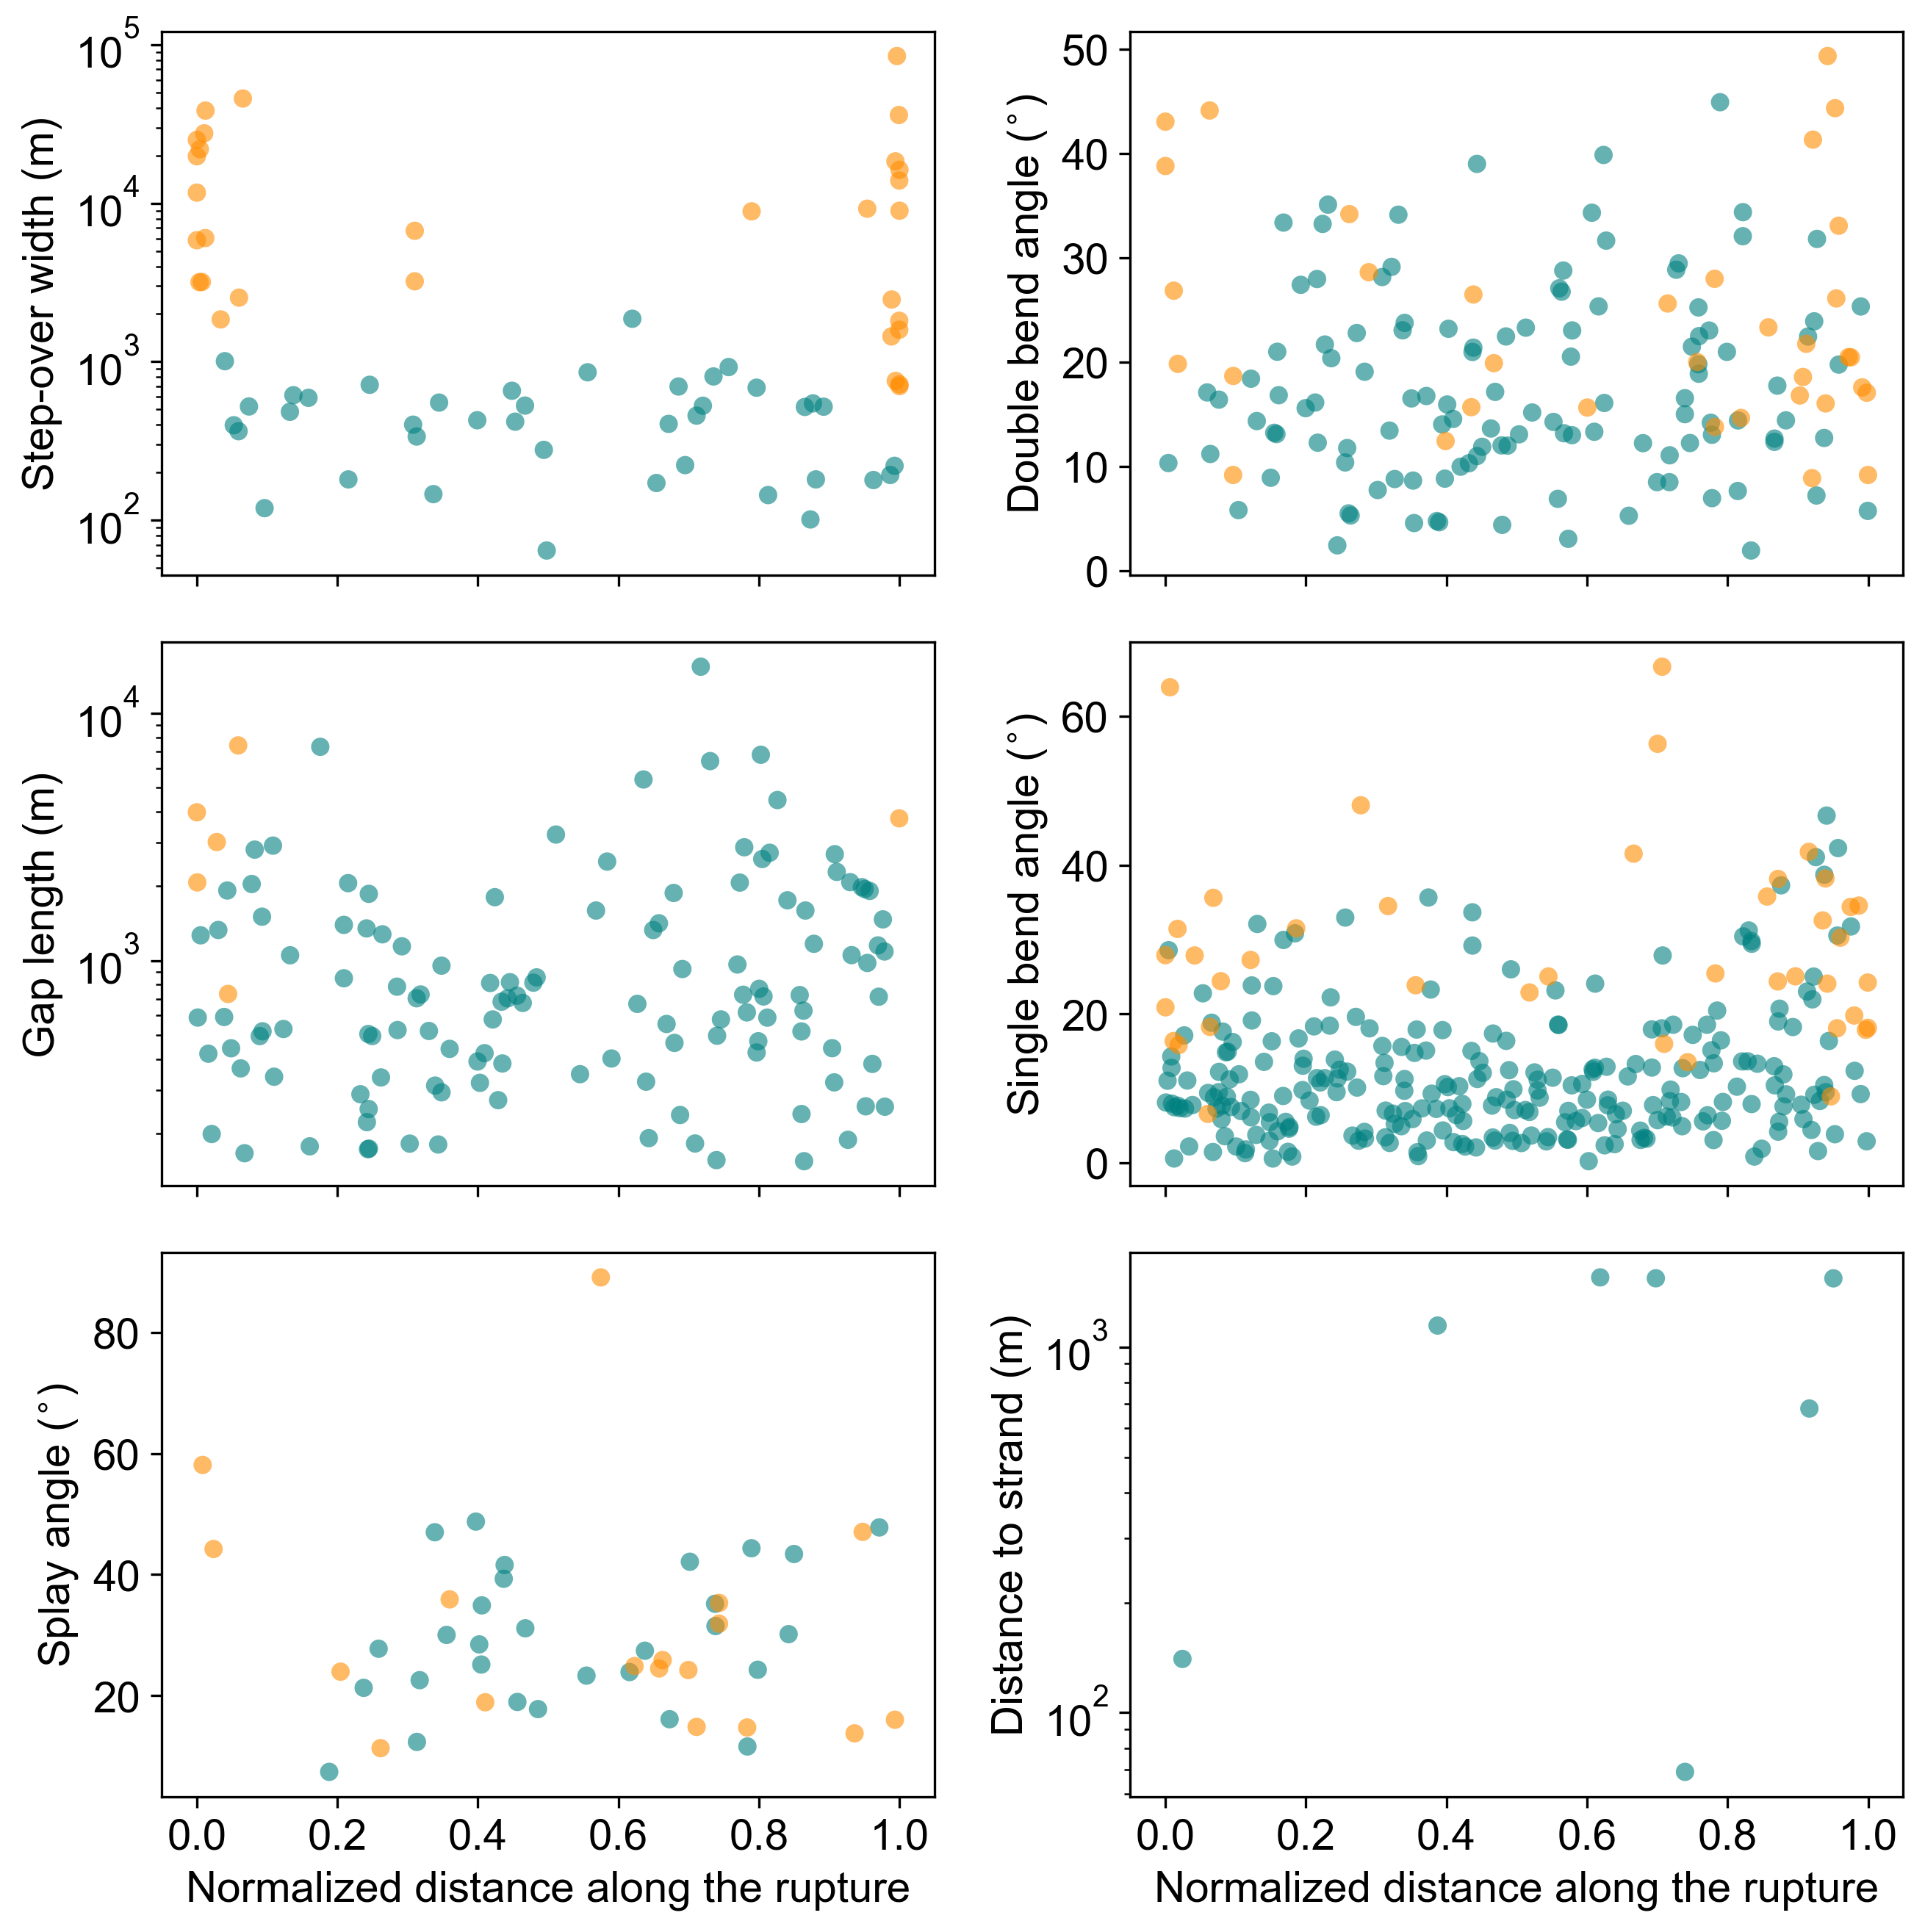

In [222]:
fig, axes = plt.subplots(3,2,figsize=(9, 9),sharex=True,dpi=300)
palette = {'breached': 'teal', 'unbreached': 'darkorange'}
gate_distribution_along_strike(grouped,'stepover','none','length',axes[0,0],'Step-over width (m)',palette)
gate_distribution_along_strike(grouped,'bend','double','angle',axes[0,1],'Double bend angle ($^{\circ}$)',palette)
gate_distribution_along_strike(grouped,'bend','single','angle',axes[1,1],'Single bend angle ($^{\circ}$)',palette)
gate_distribution_along_strike(grouped,'gap','none','length',axes[1,0],'Gap length (m)',palette)
gate_distribution_along_strike(grouped,'splay','none','angle',axes[2,0],'Splay angle ($^{\circ}$)',palette)
gate_distribution_along_strike(grouped,'strand','none','length',axes[2,1],'Distance to strand (m)',palette)
plt.tight_layout()
plt.savefig('GRL/Normalized_dist_size.pdf')
plt.show()


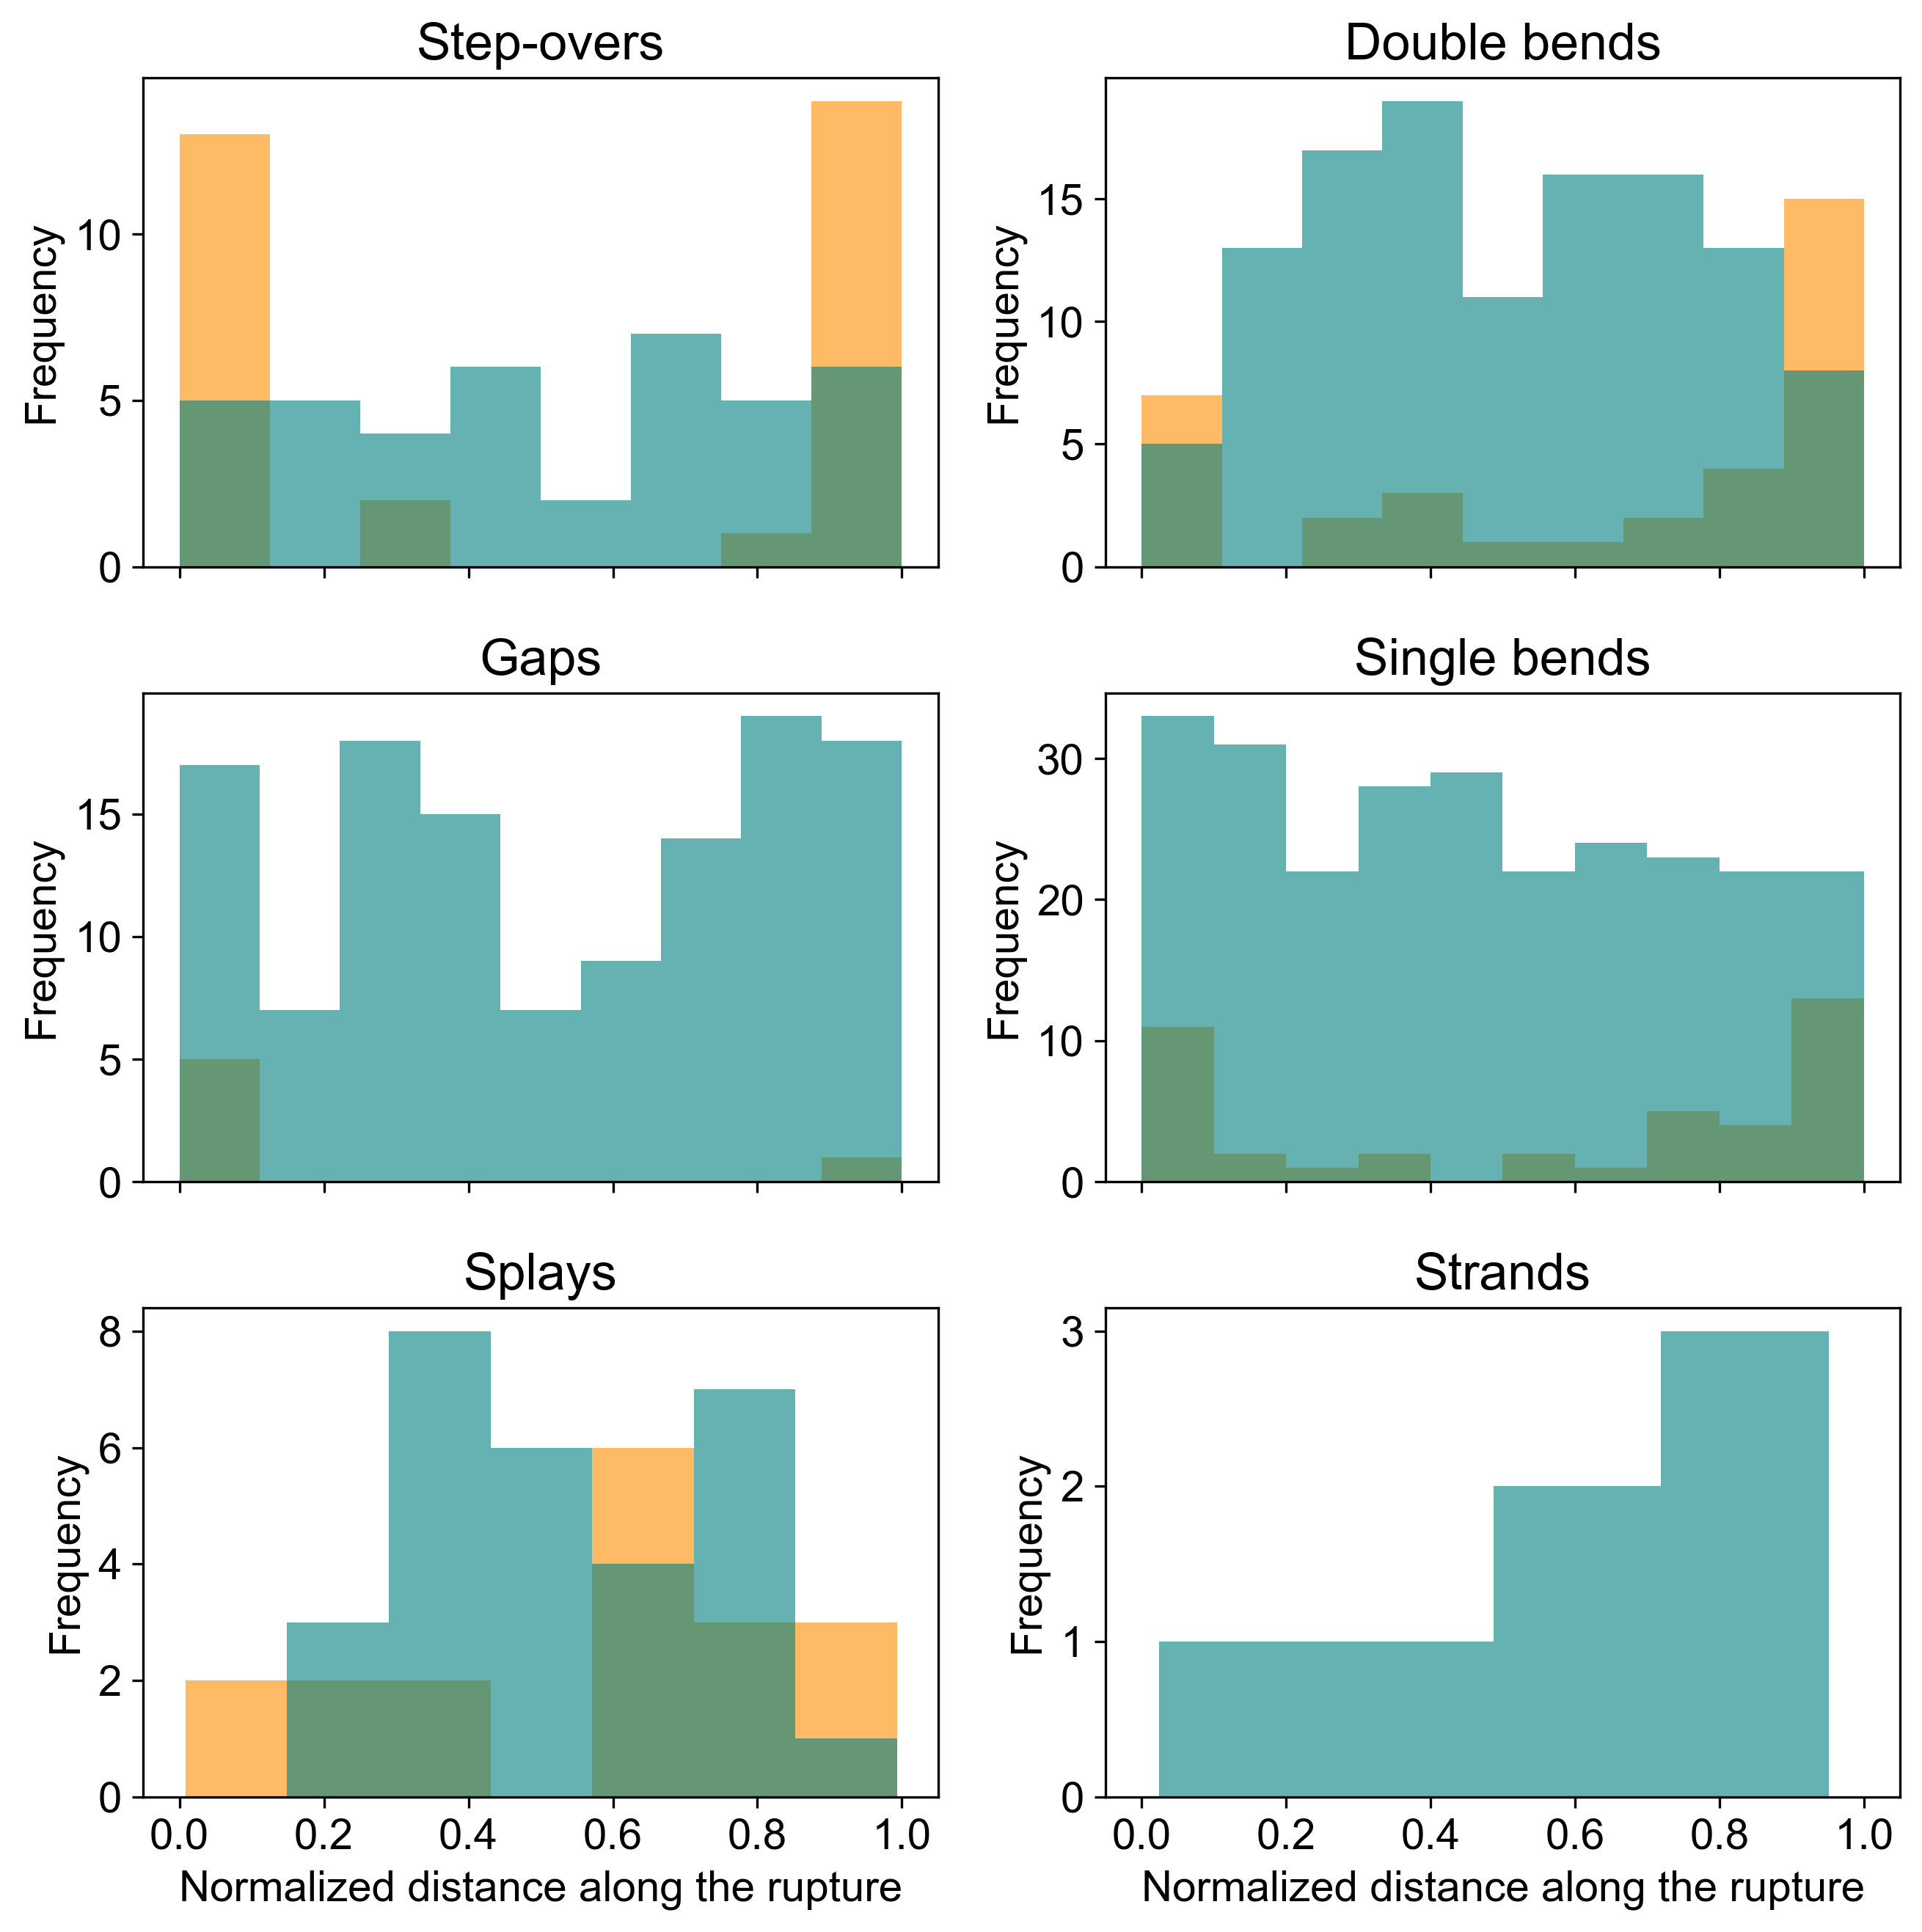

In [223]:
fig, axes = plt.subplots(3,2,figsize=(9, 9),sharex=True,dpi=300)
palette = {'breached': 'teal', 'unbreached': 'darkorange'}
gate_distribution_along_strike_histogram(grouped,'stepover','none','length',axes[0,0],'Step-overs',palette)
gate_distribution_along_strike_histogram(grouped,'bend','double','angle',axes[0,1],'Double bends',palette)
gate_distribution_along_strike_histogram(grouped,'bend','single','angle',axes[1,1],'Single bends',palette)
gate_distribution_along_strike_histogram(grouped,'gap','none','length',axes[1,0],'Gaps',palette)
gate_distribution_along_strike_histogram(grouped,'splay','none','angle',axes[2,0],'Splays',palette)
gate_distribution_along_strike_histogram(grouped,'strand','none','length',axes[2,1],'Strands',palette)
plt.tight_layout()
plt.savefig('GRL/Normalized_dist_size_histogram.pdf')
plt.show()

## Comparison to previous studies

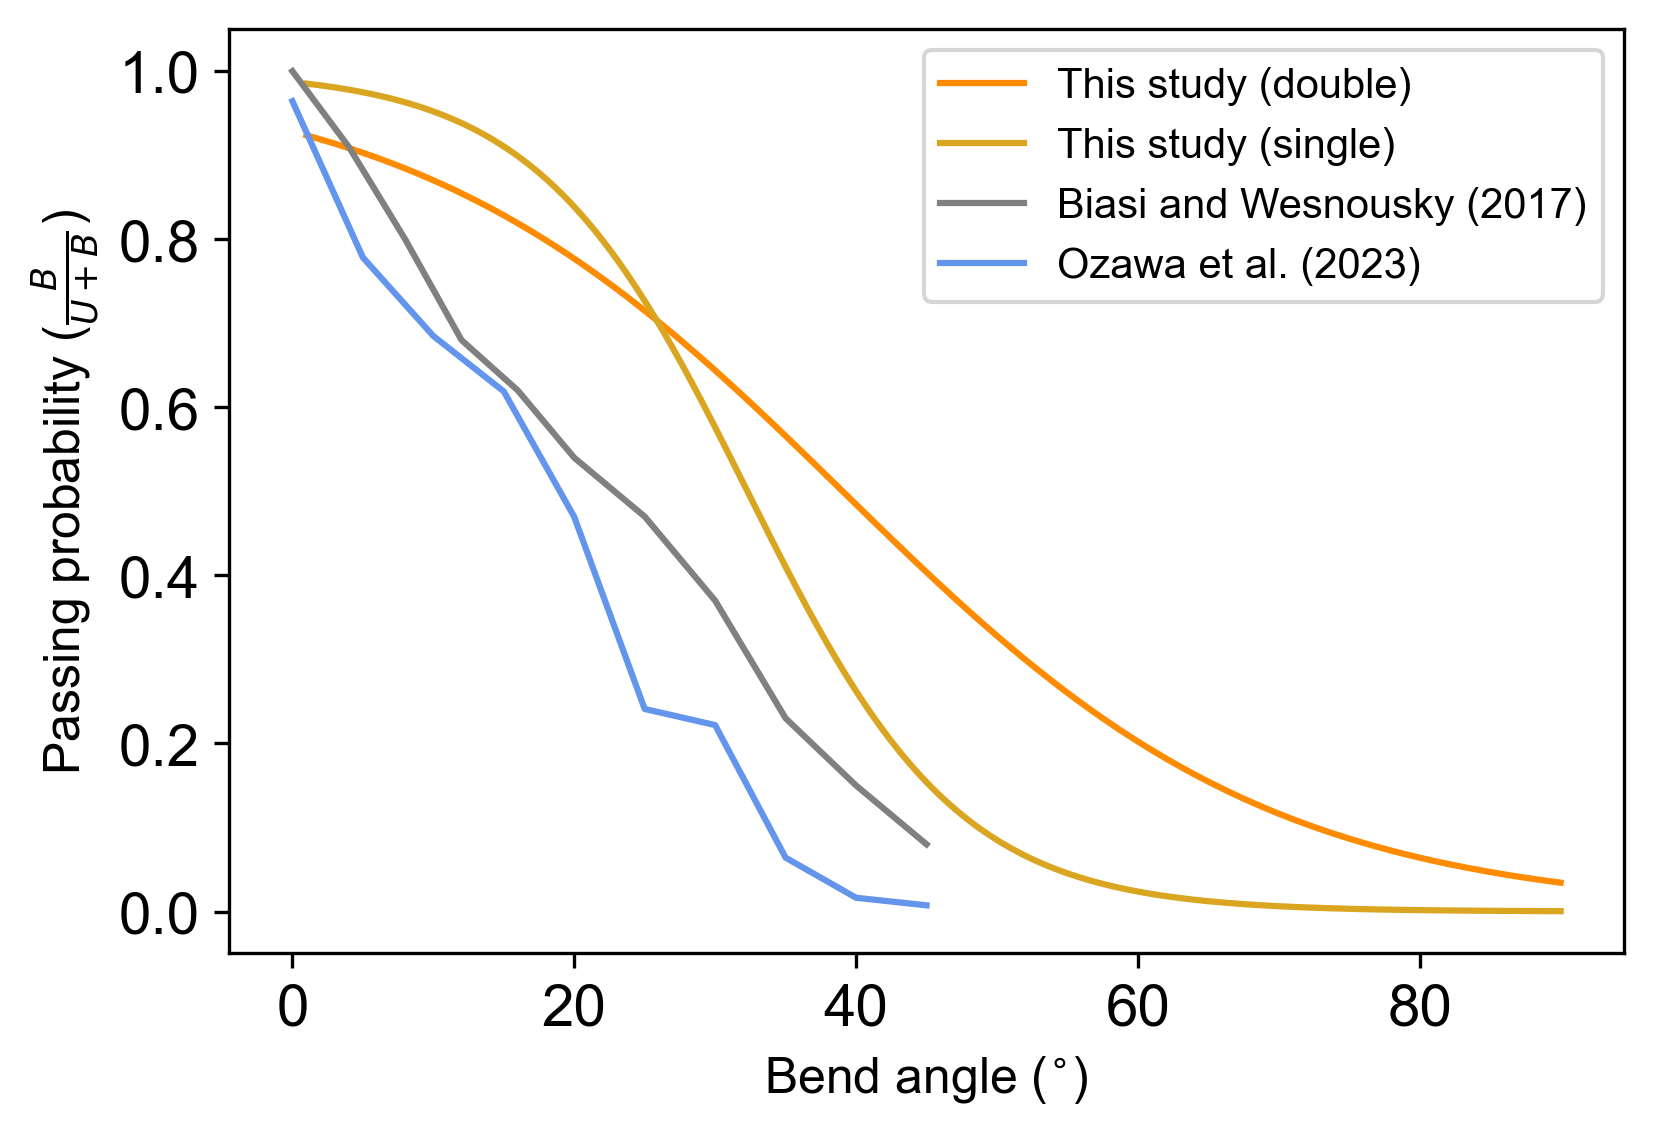

In [224]:
group = grouped.get_group('bend')
selectB= group.groupby(group["Type (single or double)"])
double = selectB.get_group('double')
double['Bin'] = pd.cut(double['Length (m) or angle (deg)'], bins=np.linspace(0,90,10)) 
double['Bin Middle'] = double['Bin'].apply(lambda x: (x.left + x.right) / 2)

breached_counts = double[double['Breached or unbreached'] == 'breached'].groupby('Bin Middle').size()

unbreached_counts = double[double['Breached or unbreached'] == 'unbreached'].groupby('Bin Middle').size()

ratio = (breached_counts/(unbreached_counts+breached_counts))

unique_values = np.linspace(0,90,10)
unique_values = calculate_center(unique_values)

plt.figure(figsize=(6,4),dpi=300)
#plt.plot(unique_values,ratio,c='darkorange',label='This study (double)')
x = np.atleast_2d(np.linspace(1, 90, 1000)).T
proba_double = log_bend_double.predict_proba(x)[:,0]
proba_single = log_bend_single.predict_proba(x)[:,0]

plt.plot(x,proba_double,c='darkorange',label='This study (double)')
plt.plot(x,proba_single,c='goldenrod',label='This study (single)')
group = grouped.get_group('bend')
selectB= group.groupby(group["Type (single or double)"])
single = selectB.get_group('single')
single['Bin'] = pd.cut(single['Length (m) or angle (deg)'], bins=np.linspace(0,90,10)) 
single['Bin Middle'] = single['Bin'].apply(lambda x: (x.left + x.right) / 2)

breached_counts = single[single['Breached or unbreached'] == 'breached'].groupby('Bin Middle').size()

unbreached_counts = single[single['Breached or unbreached'] == 'unbreached'].groupby('Bin Middle').size()

ratio = (breached_counts/(unbreached_counts+breached_counts))

unique_values = np.linspace(0,90,10)
unique_values = calculate_center(unique_values)
#plt.plot(unique_values,ratio,c='goldenrod',label='This study (single)')

# load data from Biasi and Wesnousky (2017) and Ozawa et al. (2023)
Bend_angle_Biasi = np.array([0, 4, 8, 12, 16, 20, 25, 30, 35, 40, 45])
PP_Biasi = np.array([1, 0.91, 0.80, 0.68, 0.62, 0.54, 0.47, 0.37, 0.23, 0.15, 0.08])

Bend_angle_Ozawa = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45])
PP_Ozawa = np.array([0.96428571, 0.77829376, 0.68489335, 0.61890165, 0.46959471, 0.24105128, 0.22185883, 0.06410775, 0.01640081, 0.00738151])

plt.plot(Bend_angle_Biasi, PP_Biasi,'gray',label='Biasi and Wesnousky (2017)')
plt.plot(Bend_angle_Ozawa,PP_Ozawa,'cornflowerblue', label='Ozawa et al. (2023)')
plt.ylabel(r'Passing probability ($\frac{B}{U+B}$)',fontsize=12)
plt.xlabel(r'Bend angle ($^{\circ}$)',fontsize=12)
plt.legend(fontsize=10)
plt.savefig('GRL/bendPPcomparisons.pdf')

# Displacement distributions near earthquake gates

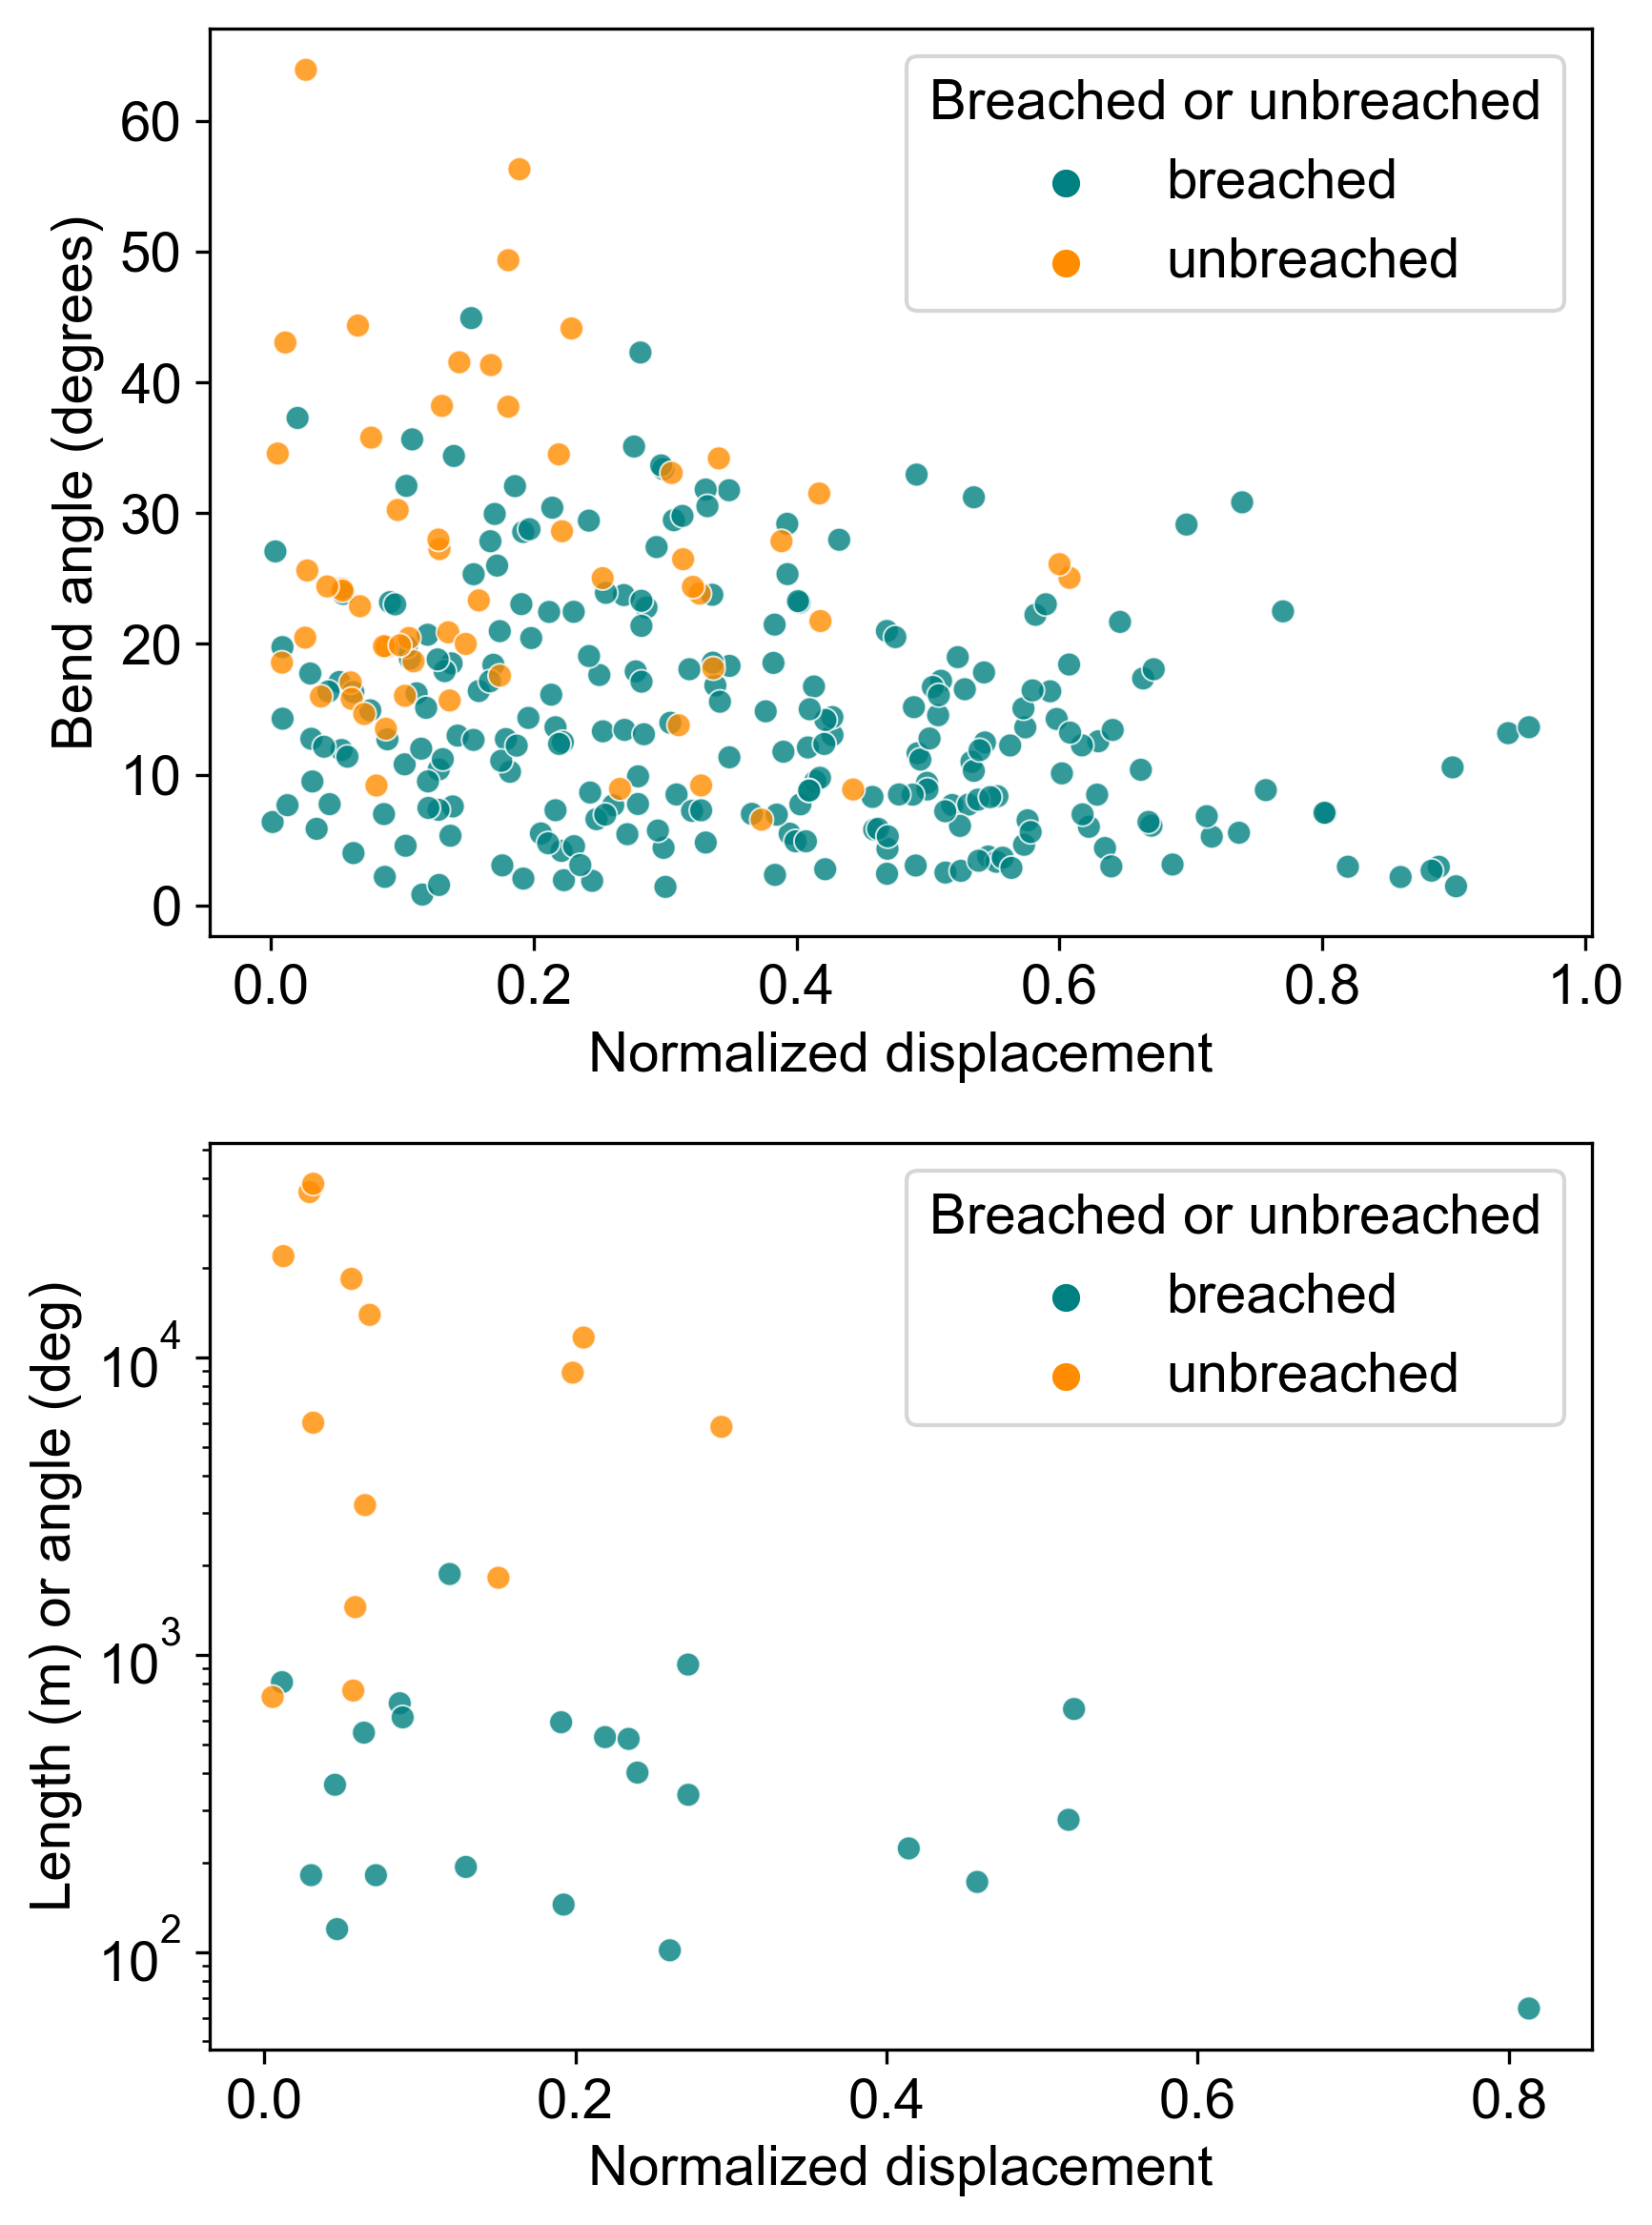

In [225]:
bends = grouped.get_group('bend')
stepovers = grouped.get_group('stepover')

custom_palette = {"breached": "teal", "unbreached": "darkorange"}

fig, axes = plt.subplots(2,1,figsize=(6,8),dpi=300)
sns.scatterplot(data=bends, y='Length (m) or angle (deg)', x='Normalized slip at gate', hue='Breached or unbreached', alpha=0.8, palette=custom_palette,ax=axes[0])
axes[0].set_ylabel('Bend angle (degrees)')
axes[0].set_xlabel('Normalized displacement')
# axes[0].set_ylim(0,1)

sns.scatterplot(data=stepovers, y='Length (m) or angle (deg)', x='Normalized slip at gate', hue='Breached or unbreached', alpha=0.8, palette=custom_palette,ax=axes[1])
axes[1].set_xlabel('Step-over width (m)')
axes[1].set_yscale('log')
axes[1].set_xlabel('Normalized displacement')
# axes[1].set_ylim(0,1)

plt.tight_layout()
plt.savefig('GRL/normalized_slip_at_gate.pdf')

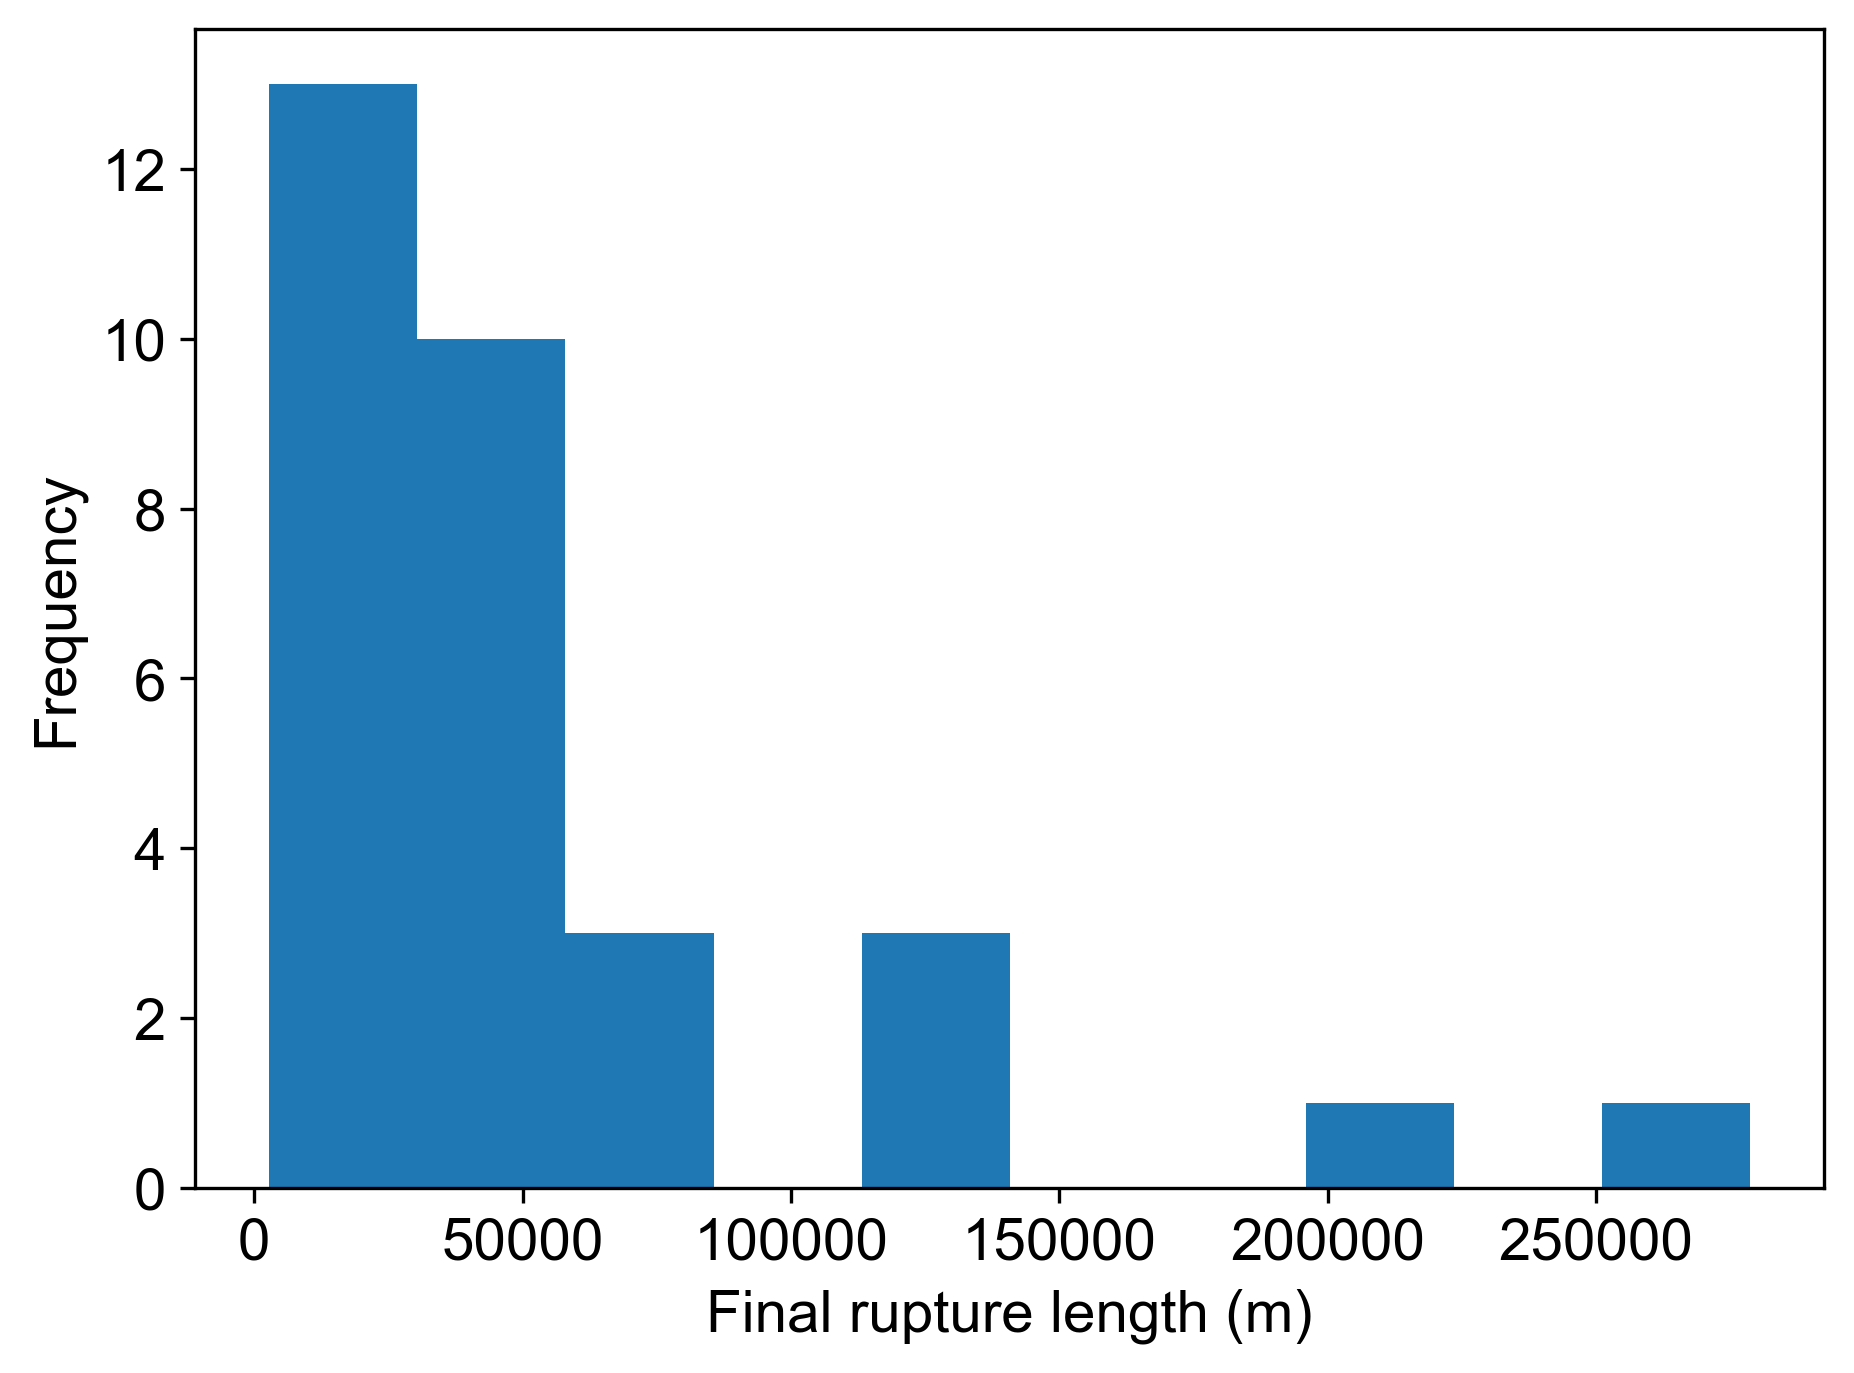

In [226]:
SRL = lastpt # final rupture length of events
plt.figure(dpi=300)
plt.hist(SRL)
plt.ylabel('Frequency')
plt.xlabel('Final rupture length (m)')
plt.tight_layout()

### Event size vs earthquake gate size

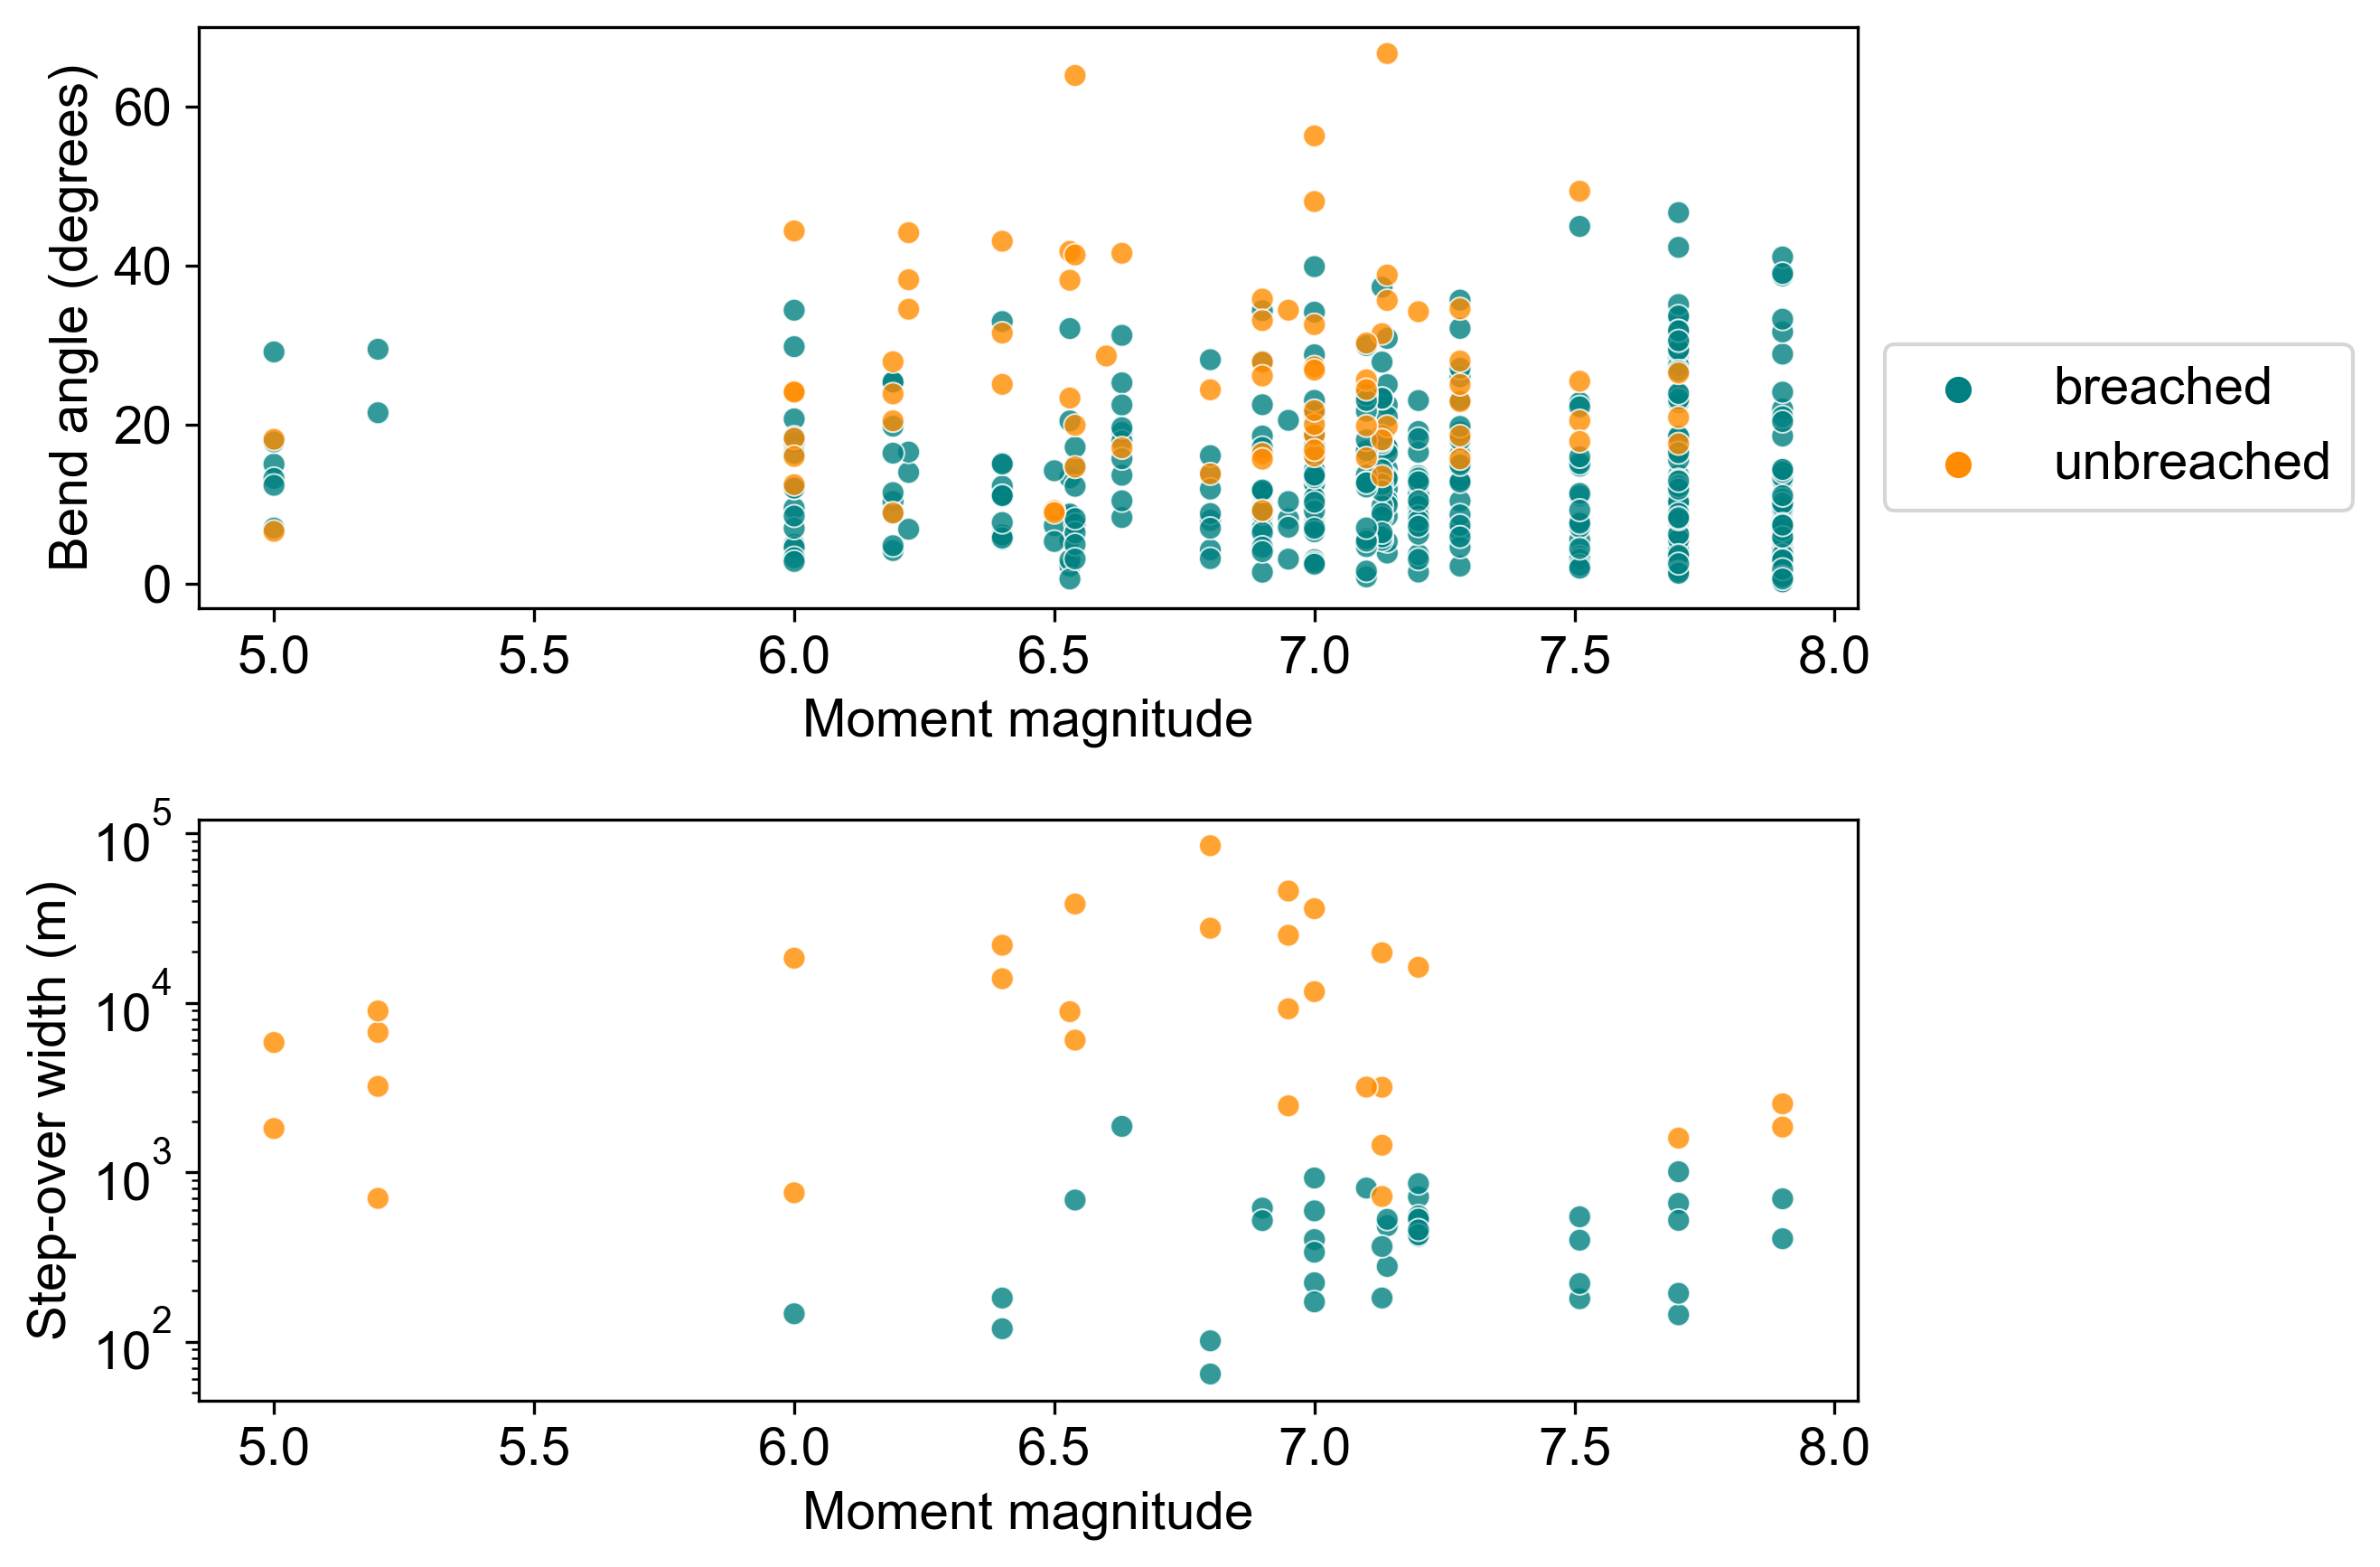

In [227]:
bends = grouped.get_group('bend')
stepovers = grouped.get_group('stepover')

custom_palette = {"breached": "teal", "unbreached": "darkorange"}

fig, axes = plt.subplots(2,1,figsize=(9,6),dpi=300)
sns.scatterplot(data=bends, x='Magnitude', y='Length (m) or angle (deg)', hue='Breached or unbreached', alpha=0.8, palette=custom_palette,ax=axes[0])
axes[0].set_ylabel('Bend angle (degrees)')
axes[0].set_xlabel('Moment magnitude')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 0.5))

sns.scatterplot(data=stepovers,  x='Magnitude', y='Length (m) or angle (deg)', hue='Breached or unbreached', alpha=0.8, palette=custom_palette,ax=axes[1])
axes[1].set_xlabel('Moment magnitude')
axes[1].set_ylabel('Step-over width (m)')
axes[1].set_yscale('log')
axes[1].legend().remove()

plt.tight_layout()
plt.savefig('GRL/size_vs_mag.pdf')

### Earthquake gate size vs distance to epicenter

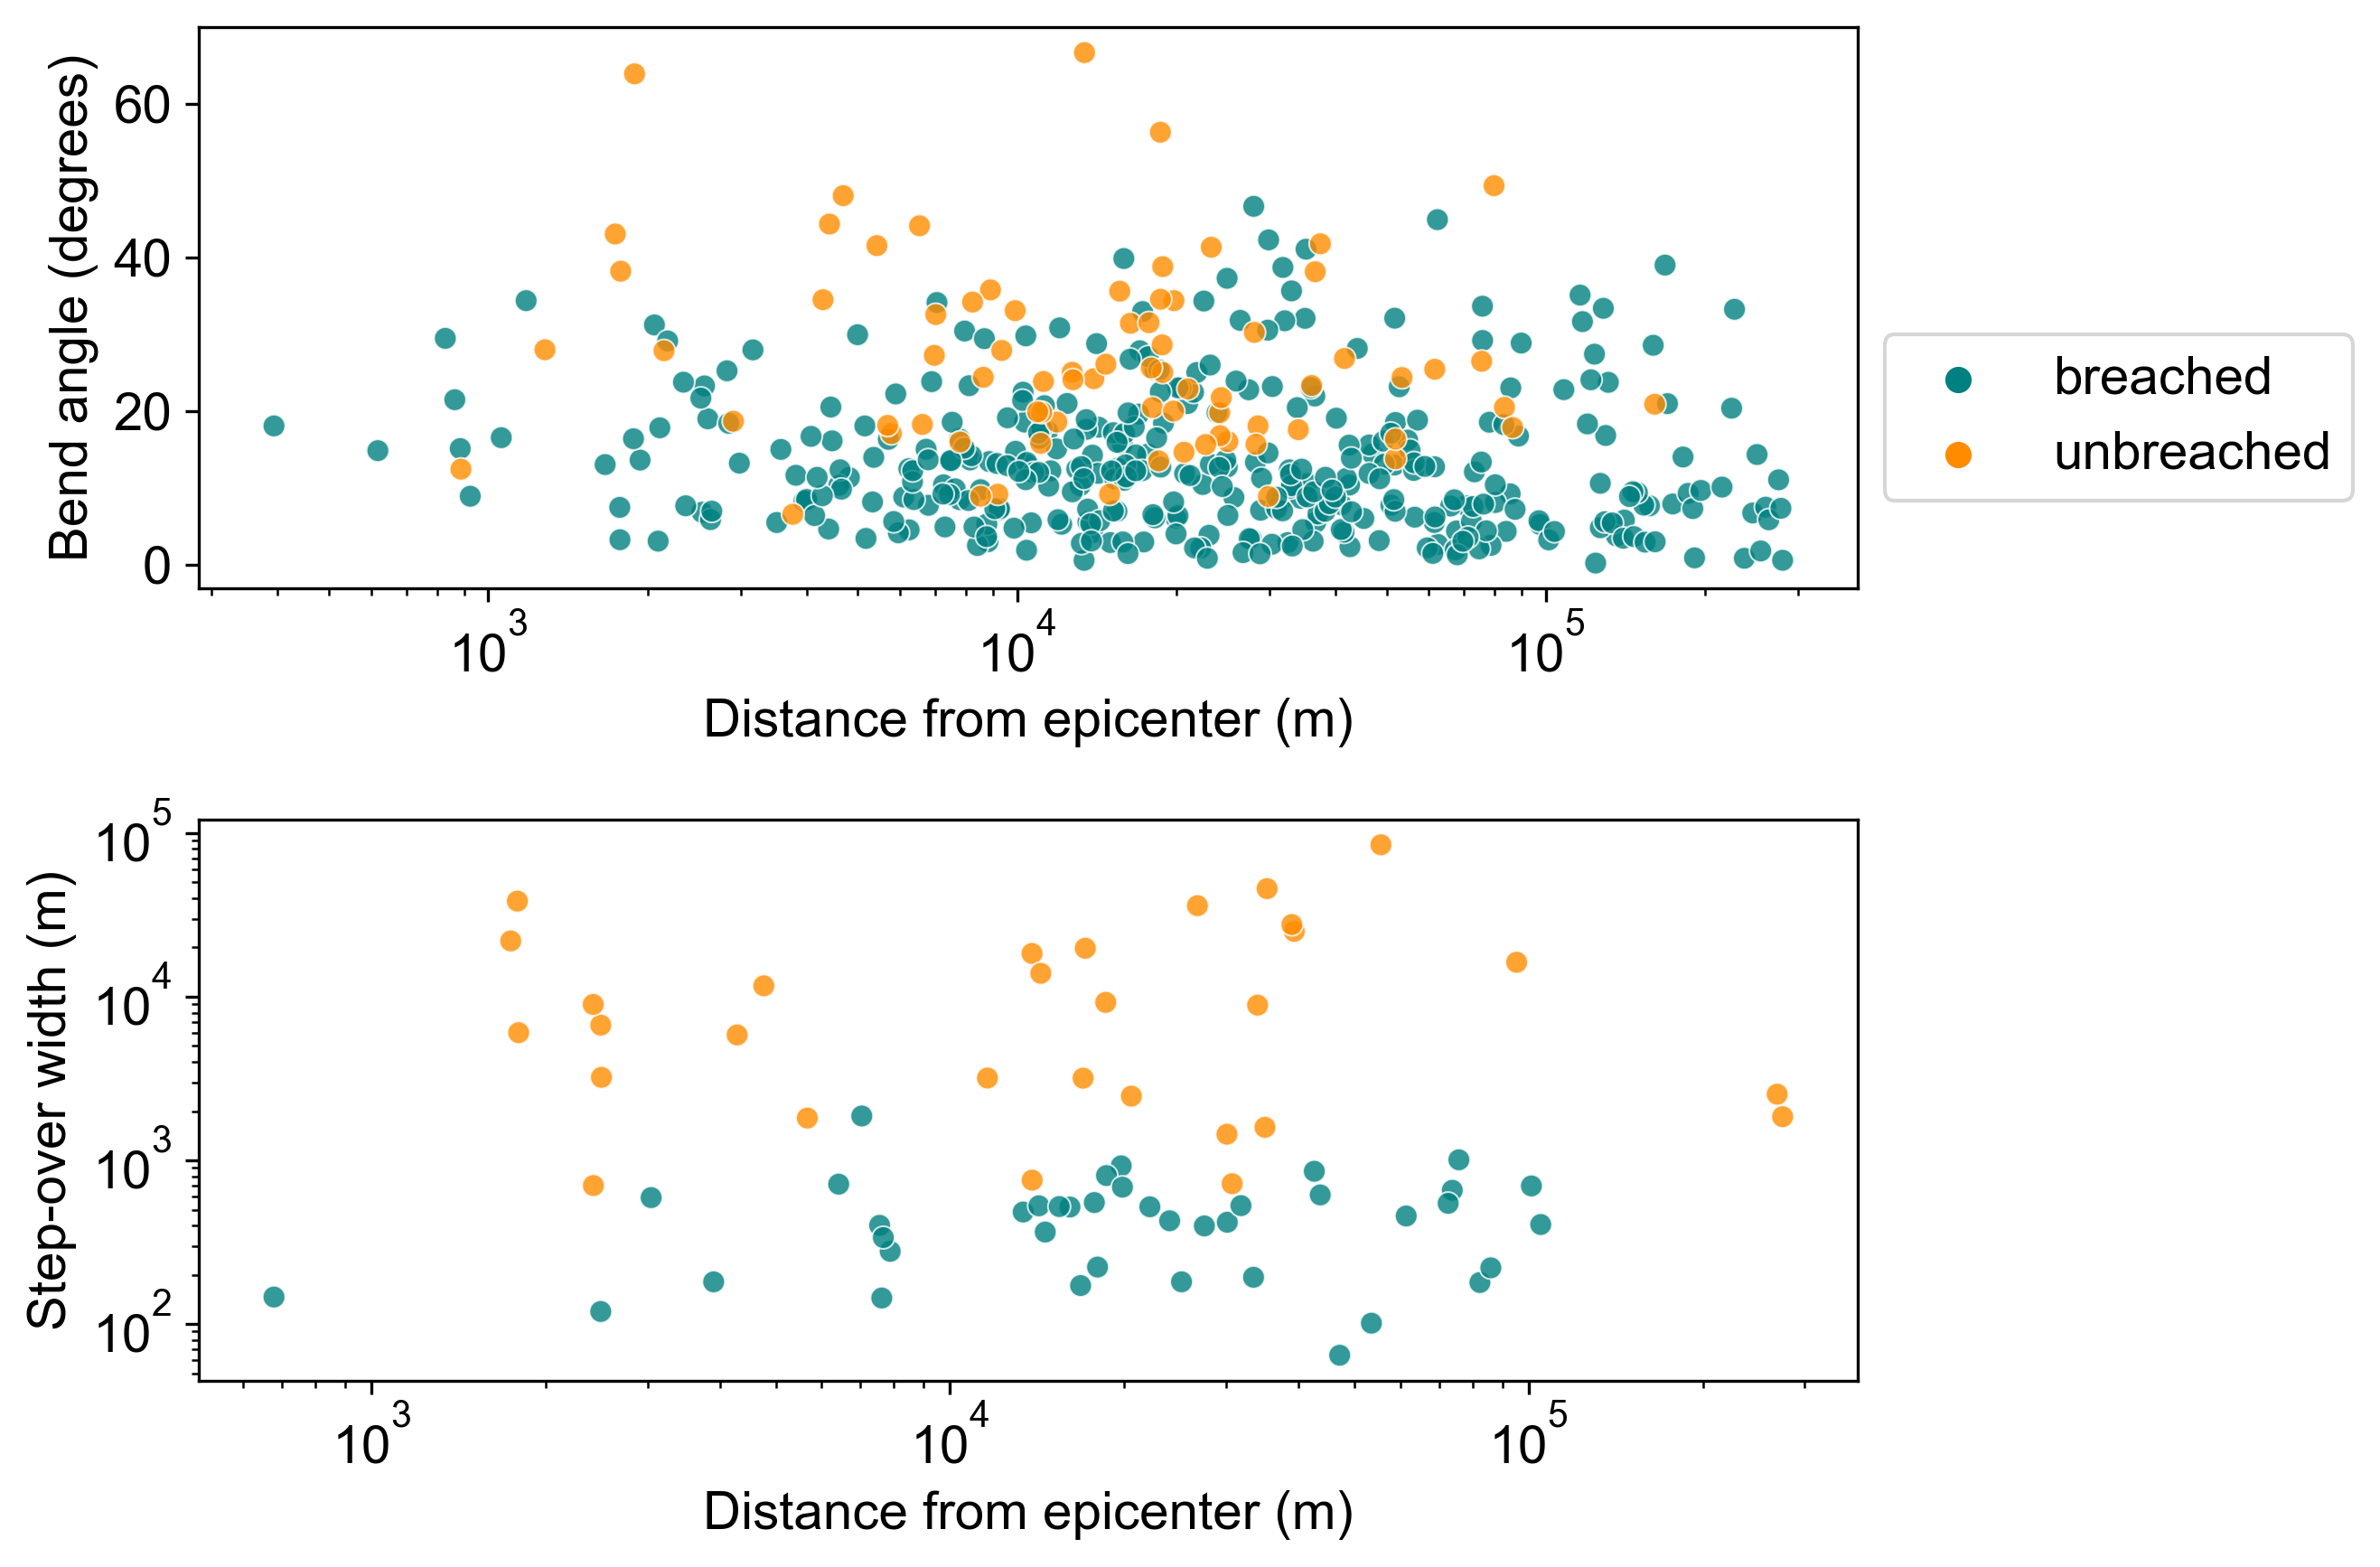

In [228]:
bends = grouped.get_group('bend')
stepovers = grouped.get_group('stepover')

custom_palette = {"breached": "teal", "unbreached": "darkorange"}

fig, axes = plt.subplots(2,1,figsize=(9,6),dpi=300)
sns.scatterplot(data=bends, x='Distance to epicenter', y='Length (m) or angle (deg)', hue='Breached or unbreached', alpha=0.8, palette=custom_palette,ax=axes[0])
axes[0].set_ylabel('Bend angle (degrees)')
axes[0].set_xlabel('Distance from epicenter (m)')
axes[0].set_xscale('log')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 0.5))

sns.scatterplot(data=stepovers,  x='Distance to epicenter', y='Length (m) or angle (deg)', hue='Breached or unbreached', alpha=0.8, palette=custom_palette,ax=axes[1])
axes[1].set_xlabel('Distance from epicenter (m)')
axes[1].set_ylabel('Step-over width (m)')
axes[1].set_yscale('log')
axes[1].set_xscale('log')
axes[1].legend().remove()

plt.tight_layout()
plt.savefig('GRL/size_vs_epi.pdf')

### Making a latex table and exporting all the results

In [229]:
x_double = np.atleast_2d(39).T
proba_double = log_bend_double.predict_proba(x_double)[:,0]
x_single = np.atleast_2d(32).T
proba_single = log_bend_single.predict_proba(x_single)[:,0]
x_stepover = np.atleast_2d(np.log10(1120)).T
proba_stepover = log_stepover.predict_proba(x_stepover)[:,0]
x_gap = np.atleast_2d(np.log10(13000)).T
proba_gap= log_gap.predict_proba(x_gap)[:,0]

In [230]:
proba_gap

array([0.5079364])

In [235]:
# info to export 
# ks test for populations of earthquake gates

data_ks = {
    'Feature A': ['Breached double bend', 'Breached single bend', 'Breached step-over', 'Breached gaps', 'Breached splay', 'Releasing unbreached bend', 'Releasing breached bend', 'Releasing breached step-over', 'Releasing unbreached step-over'],
    'Feature B': ['Unbreached double bend', 'Unbreached single bend', 'Unbreached step-over', 'Unbreached gaps', 'Unbreached splay', 'Restraining unbreached bend', 'Restraining breached bend', 'Restraining breached step-over', 'Restraining unbreached step-over'],
    'p-value from ks test': [double_bend_ks[1], single_bend_ks[1], stepover_ks[1], gap_ks[1], splay_ks[1], releasing_restraining_unbreached_bend_ks[1], releasing_restraining_breached_bend_ks[1], releasing_restraining_breached_stepover_ks[1], releasing_restraining_unbreached_stepover_ks[1]]
}

ks_data_export = pd.DataFrame(data_ks)

latex_table_ks = ks_data_export.to_latex(index=False) 
with open('latex_table_ks.tex', 'w') as file:
    file.write(latex_table_ks)

# passing probabilities 

data_passing_probabilities = {
    'Feature': ['Double bends', 'Single bends', 'Step-overs', 'Gaps'],
    'Closest geometry to passing probability = 50%': [int(x_double[0]), int(x_single[0]), int(x_stepover[0]), int(x_gap[0])],
    'Units': ['degrees', 'degrees', 'meters', 'meters']
}


passing_probabilities_data_export = pd.DataFrame(data_passing_probabilities)

latex_table_passing_probabilities = passing_probabilities_data_export.to_latex(index=False) 
with open('latex_table_passing_probabilities.tex', 'w') as file:
    file.write(latex_table_passing_probabilities)

### Test passing probabilities removing all unbreached features that are not at rupture ends

In [232]:
# condition = ~((data["Breached or unbreached"] == 'unbreached') & 
#               (data['Normalized location'] > 0.1) & 
#               (data['Normalized location'] < 0.9))

# data_nounbreached_middle = data[condition]
# feature = data_nounbreached_middle["Feature"].unique()
# grouped = data_nounbreached_middle.groupby(data.Feature)

# fig, axes = plt.subplots(2,2,figsize=(8,8), sharey=True, dpi=300)
 
# log_stepover, acc_stepover, pre_stepover, f1_stepover, roc_stepover, confusion_matrix_stepover, BUbin_stepover,xstepover = build_logistic_regression(
#     grouped,
#     'stepover', 
#     'none', 
#     'length', 
#     None, 
#     axes[0,0],
#     50,
#     100000,
#     'slategrey',
#     'Step-over width (m)',
#     5
# )

# log_bend_double, acc_bend_double, pre_bend_double, f1_bend_double, roc_bend_double, confusion_matrix_bend_double,BUbin_bend_double,xbenddouble= build_logistic_regression(grouped,'bend', 'double', 'angle',None,axes[0,1],0,90,'slategrey','Double bend angle ($^{\circ}$)',2.5)
# log_bend_single, acc_bend_single, pre_bend_single, f1_bend_single, roc_bend_single, confusion_matrix_bend_single,BUbin_bend_single,xbendsingle = build_logistic_regression(grouped,'bend', 'single', 'angle', None,
#                                                                                                                                                                            axes[1,1],0,90,'slategrey','Single bend angle ($^{\circ}$)',2.5)

# log_gap, acc_gap, pre_gap, f1_gap, roc_gap, confusion_matrix_gap, BUbin_gap,xgap = build_logistic_regression(grouped,'gap', 'none', 'length', None, axes[1,0],50,100000,'slategrey','Gap length (m)',3)


# # add labels
# axes[0,0].text(50,-0.3,'a',fontsize=14)
# axes[0,1].text(0,-0.3,'b',fontsize=14)
# axes[1,0].text(50,-0.3,'c',fontsize=14)
# axes[1,1].text(0,-0.3,'d',fontsize=14)

# plt.tight_layout()
# plt.savefig('GRL/PP_EQgates_nounbreached_middle.pdf')
# plt.show()